In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# import nltk
# from nltk import FreqDist, word_tokenize
# import string, re
# import urllib
# from nltk.stem.snowball import SnowballStemmer
# from nltk.corpus import stopwords
# from nltk.collocations import *
# from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors
from gensim.models import word2vec
import gensim

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

#Visualization
# from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import pickle

%run my_functions.ipynb

In [3]:
import keras
from keras.preprocessing import text, sequence
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam, rmsprop
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model

from gensim.models import KeyedVectors

In [4]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [52]:
X = df.tokenized_tweet
y = df.label

In [22]:
list(df.tokenized_tweet)

[['sad',
  'to',
  'see',
  'the',
  'scenes',
  'of',
  'hooligans',
  'pre',
  'engrus',
  'why',
  'spoil',
  'the',
  'pay',
  'euro'],
 ['gooddyeyoung',
  'yoyoyo',
  'super',
  'happy',
  'to',
  'be',
  'apa',
  'of',
  'the',
  'movement'],
 ['queen',
  'evil',
  's',
  'bihday',
  'lnic',
  'lnicjustanevilbday',
  'bihday',
  'suit',
  'evil',
  'love',
  'yolo',
  'stoops',
  'seriously'],
 ['you',
  'might',
  'be',
  'a',
  'libtard',
  'if',
  'libtard',
  'sjw',
  'liberal',
  'politics'],
 ['what', 'are', 'your', 'goals', 'find', 'out', 'here', 'smile'],
 ['retweets', 'nuascannan'],
 ['a', 'classic', 'trump', 'follower'],
 ['in',
  'the',
  'mixture',
  'of',
  'emotions',
  'here',
  's',
  'a',
  'one',
  'from',
  'the',
  'weekend',
  'w',
  'thx',
  'pride'],
 ['the',
  'meps',
  'bear',
  'that',
  'travelled',
  'to',
  'sandy',
  'hook',
  'in',
  'with',
  'hope',
  'that',
  'another',
  'gun',
  'massacre',
  'would',
  'never',
  'occur',
  'again'],
 ['just'

In [65]:
X_token_list = list(df.tokenized_tweet)
# X_token_sumlist = sum(X_token_list,[])
# X_unique_tokens = set(X_token_sumlist)

In [ ]:
print('The unique number of words in the dataset is: {}'.format(len(X_unique_tokens)))

In [26]:
list(df.no_hash_tweet)

['sad to see the scenes of hooligans pre engrus why spoil the pay euro',
 'gooddyeyoung yoyoyo super happy to be apa of the movement',
 'queen evil s bihday lnic lnicjustanevilbday bihday suit evil love yolo stoops seriously',
 'you might be a libtard if libtard sjw liberal politics',
 'what are your goals find out here smile',
 'retweets nuascannan',
 'a classic trump follower',
 'in the mixture of emotions here s a one from the weekend w thx pride',
 'the meps bear that travelled to sandy hook in with hope that another gun massacre would never occur again',
 'just because it affected her son son s abuse prompts angela kennedy to change sex ed stance via',
 'thomas always says i live in a dream world no this is real life it just might seem like a dream to others  life blessed',
 'when the local library tries to charge you once again for fees you ve already paid twice before ineedtosavethereceipt frustrated',
 'cia ncs sockpuppetarmy hbgary troll snowden amp their sop is logical fallac

In [46]:
max(len(tweet) for tweet in df.no_hash_tweet)

139

In [32]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(list(df.no_hash_tweet))

In [33]:
print(tokenizer.word_counts)

OrderedDict([('sad', 429), ('to', 9866), ('see', 762), ('the', 10238), ('scenes', 11), ('of', 4261), ('hooligans', 5), ('pre', 42), ('engrus', 8), ('why', 505), ('spoil', 5), ('pay', 278), ('euro', 167), ('gooddyeyoung', 2), ('yoyoyo', 1), ('super', 115), ('happy', 1706), ('be', 2490), ('apa', 13), ('movement', 18), ('queen', 53), ('evil', 29), ('s', 3595), ('bihday', 866), ('lnic', 3), ('lnicjustanevilbday', 3), ('suit', 17), ('love', 2762), ('yolo', 18), ('stoops', 1), ('seriously', 47), ('you', 5949), ('might', 223), ('a', 6540), ('libtard', 152), ('if', 697), ('sjw', 74), ('liberal', 99), ('politics', 129), ('what', 1175), ('are', 1894), ('your', 1702), ('goals', 64), ('find', 303), ('out', 950), ('here', 518), ('smile', 724), ('retweets', 10), ('nuascannan', 6), ('classic', 19), ('trump', 407), ('follower', 11), ('in', 4704), ('mixture', 2), ('emotions', 43), ('one', 797), ('from', 1058), ('weekend', 597), ('w', 203), ('thx', 20), ('pride', 46), ('meps', 2), ('bear', 248), ('that'

In [34]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'i': 3, 'a': 4, 'you': 5, 'and': 6, 'in': 7, 'for': 8, 'of': 9, 'is': 10, 'my': 11, 'it': 12, 's': 13, 'love': 14, 'this': 15, 'on': 16, 'with': 17, 'be': 18, 't': 19, 'day': 20, 'that': 21, 'all': 22, 'so': 23, 'are': 24, 'me': 25, 'amp': 26, 'happy': 27, 'your': 28, 'at': 29, 'have': 30, 'we': 31, 'am': 32, 'can': 33, 'just': 34, 'will': 35, 'when': 36, 'not': 37, 'do': 38, 'u': 39, 'what': 40, 'life': 41, 'like': 42, 'time': 43, 'm': 44, 'but': 45, 'today': 46, 'from': 47, 'up': 48, 'now': 49, 'new': 50, 'thankful': 51, 'out': 52, 'as': 53, 'positive': 54, 'get': 55, 'was': 56, 'people': 57, 'about': 58, 'how': 59, 'our': 60, 'bihday': 61, 'good': 62, 'by': 63, 'no': 64, 'they': 65, 'one': 66, 'see': 67, 'more': 68, 'smile': 69, 'if': 70, 'don': 71, 'go': 72, 'who': 73, 'want': 74, 'father': 75, 'he': 76, 'take': 77, 'work': 78, 'healthy': 79, 're': 80, 'fun': 81, 'weekend': 82, 'an': 83, 'summer': 84, 'has': 85, 'there': 86, 'or': 87, 'make': 88, 'family': 89, '

In [36]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 37794 unique tokens


In [37]:
sequences = tokenizer.texts_to_sequences(df['no_hash_tweet'])

In [38]:
sequences

[[122, 2, 67, 1, 3004, 9, 5338, 1048, 3813, 102, 5339, 1, 189, 311],
 [9779, 14883, 443, 27, 2, 18, 2614, 9, 1, 2053],
 [858, 1400, 13, 61, 7619, 7620, 61, 2140, 1400, 14, 2054, 14884, 957],
 [5, 233, 18, 4, 336, 70, 336, 635, 501, 392],
 [40, 24, 28, 719, 175, 52, 95, 69],
 [3240, 4671],
 [4, 1978, 128, 3005],
 [7, 1, 9780, 9, 1030, 95, 13, 4, 66, 47, 1, 82, 254, 1897, 978],
 [1,
  9781,
  215,
  21,
  6253,
  2,
  3006,
  3814,
  7,
  17,
  202,
  21,
  197,
  591,
  2479,
  192,
  125,
  6254,
  185],
 [34,
  156,
  12,
  2055,
  126,
  518,
  518,
  13,
  2141,
  9782,
  9783,
  14885,
  2,
  282,
  346,
  2615,
  7621,
  180],
 [3815,
  147,
  412,
  3,
  151,
  7,
  4,
  458,
  112,
  64,
  15,
  10,
  307,
  41,
  12,
  34,
  233,
  1979,
  42,
  4,
  458,
  2,
  479,
  41,
  203],
 [36,
  1,
  947,
  2480,
  4170,
  2,
  2346,
  5,
  617,
  185,
  8,
  5340,
  5,
  146,
  403,
  1181,
  2056,
  240,
  14886,
  1591],
 [14887,
  9784,
  14888,
  14889,
  1898,
  14890,
  26,
  1

In [39]:
sorted(sequences[0])

[1, 1, 2, 9, 67, 102, 122, 189, 311, 1048, 3004, 3813, 5338, 5339]

In [45]:
df.no_hash_tweet[0]

'sad to see the scenes of hooligans pre engrus why spoil the pay euro'

In [40]:
for word, idx in word_index.items():     
    if idx in  sequences[0]:
        print(word, idx)

the 1
to 2
of 9
see 67
why 102
sad 122
pay 189
euro 311
pre 1048
scenes 3004
engrus 3813
hooligans 5338
spoil 5339


In [105]:
# How to get vector representation based on its index. Example:
print(tokenizer.index_word[4])
RNN_w2v_model[tokenizer.index_word[4]]

a


array([-1.0186473 ,  0.4185874 ,  0.03718451,  0.13528629, -0.3650397 ,
       -0.24703623,  0.13331461,  0.4074878 , -0.35624728,  0.17563938,
        0.00712319,  0.01918386,  0.2879449 , -0.01450821,  0.17457229,
        0.50118345,  0.09059349,  0.44188038,  0.31068277,  0.4914089 ,
       -0.38725615,  0.44174948,  0.5374021 , -0.39309922, -0.08533598,
       -0.3093519 , -0.06766933,  0.25305778, -0.07284808, -0.09308872,
       -0.589171  , -0.36277574,  0.891046  ,  0.505584  ,  0.33271816,
        0.09240952,  0.17265312,  0.47411552, -0.3658286 ,  0.67331785,
       -0.05973436, -0.15029033, -0.32715532, -1.2932861 , -0.4935069 ,
        0.5618585 ,  0.10268716, -0.34561443, -0.14907531, -0.57659984,
       -0.24560836,  0.02173907,  0.2904836 ,  0.09267468,  0.8894296 ,
        0.4317911 , -0.01069878,  0.29918158, -0.36767432,  0.09429818,
       -0.23425491, -0.63184214, -0.14301509, -0.01182534, -0.32139218,
        0.48877037,  0.41033775,  0.18384059,  0.05987484, -0.04

In [53]:
sequences

[[122, 2, 67, 1, 3004, 9, 5338, 1048, 3813, 102, 5339, 1, 189, 311],
 [9779, 14883, 443, 27, 2, 18, 2614, 9, 1, 2053],
 [858, 1400, 13, 61, 7619, 7620, 61, 2140, 1400, 14, 2054, 14884, 957],
 [5, 233, 18, 4, 336, 70, 336, 635, 501, 392],
 [40, 24, 28, 719, 175, 52, 95, 69],
 [3240, 4671],
 [4, 1978, 128, 3005],
 [7, 1, 9780, 9, 1030, 95, 13, 4, 66, 47, 1, 82, 254, 1897, 978],
 [1,
  9781,
  215,
  21,
  6253,
  2,
  3006,
  3814,
  7,
  17,
  202,
  21,
  197,
  591,
  2479,
  192,
  125,
  6254,
  185],
 [34,
  156,
  12,
  2055,
  126,
  518,
  518,
  13,
  2141,
  9782,
  9783,
  14885,
  2,
  282,
  346,
  2615,
  7621,
  180],
 [3815,
  147,
  412,
  3,
  151,
  7,
  4,
  458,
  112,
  64,
  15,
  10,
  307,
  41,
  12,
  34,
  233,
  1979,
  42,
  4,
  458,
  2,
  479,
  41,
  203],
 [36,
  1,
  947,
  2480,
  4170,
  2,
  2346,
  5,
  617,
  185,
  8,
  5340,
  5,
  146,
  403,
  1181,
  2056,
  240,
  14886,
  1591],
 [14887,
  9784,
  14888,
  14889,
  1898,
  14890,
  26,
  1

In [47]:
padded_data = sequence.pad_sequences(sequences, maxlen=139, padding='post')

In [89]:
# labels = np.array(labels)
print('Shape of data tensor:', padded_data.shape)
# print('Shape of label tensor:', df.class.shape)

Shape of data tensor: (31962, 139)


In [92]:
# # get the data into a 3 dimensional array: number of sentences by max length by dim_size (100)

# sentences_to_word_idx_df = pd.DataFrame(np.concatenate((padded_data.reshape(31962, 1), np.zeros((31962, 100))), axis=1))

# # add the vectors to the dataframe corresponding to the word sequence numbers

# for i in range(len(sen_to_word_df)):
#     word = sen_to_word_df.loc[i, 0]
#     try:
#         vec = RNN_word2vec[tokenizer.index_word[word]]
#         sen_to_word_df.iloc[i, 1:] = vec
#     except:
#         pass

# seq_to_word_array = np.array(sentences_to_word_idx_df.iloc[:, 1:]).reshape(-1, 139, 100)

In [121]:
num_words = 37795
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    print(word, i)
    if word in RNN_w2v_model.wv.vocab:
        embedding_matrix[i] = RNN_w2v_model.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

the 1
to 2
i 3
a 4
you 5
and 6
in 7
for 8
of 9
is 10
my 11
it 12
s 13
love 14
this 15
on 16
with 17
be 18
t 19
day 20
that 21
all 22
so 23
are 24
me 25
amp 26
happy 27
your 28
at 29
have 30
we 31
am 32
can 33
just 34
will 35
when 36
not 37
do 38
u 39
what 40
life 41
like 42
time 43
m 44
but 45
today 46
from 47
up 48
now 49
new 50
thankful 51
out 52
as 53
positive 54
get 55
was 56
people 57
about 58
how 59
our 60
bihday 61
good 62
by 63
no 64
they 65
one 66
see 67
more 68
smile 69
if 70
don 71
go 72
who 73
want 74
father 75
he 76
take 77
work 78
healthy 79
re 80
fun 81
weekend 82
an 83
summer 84
has 85
there 86
or 87
make 88
family 89
got 90
us 91
days 92
friday 93
best 94
here 95
great 96
his 97
way 98
need 99
friends 100
beautiful 101
why 102
bull 103
only 104
going 105
first 106
really 107
their 108
wait 109
morning 110
music 111
world 112
back 113
ur 114
tomorrow 115
week 116
know 117
some 118
been 119
very 120
cute 121
sad 122
orlando 123
fathersday 124
never 125
her 126
think 127


goodtimes 1363
attention 1364
delicious 1365
client 1366
ball 1367
gives 1368
fat 1369
awards 1370
pig 1371
cards 1372
boss 1373
within 1374
answer 1375
fab 1376
hispanic 1377
singer 1378
rainbow 1379
society 1380
growing 1381
cream 1382
possible 1383
woke 1384
pls 1385
positivevibes 1386
board 1387
worse 1388
pick 1389
hopefully 1390
current 1391
afraid 1392
market 1393
google 1394
imagine 1395
breaking 1396
grimmie 1397
piece 1398
theatre 1399
evil 1400
happiest 1401
cuz 1402
announce 1403
exercise 1404
foodie 1405
swimming 1406
keeping 1407
plans 1408
flying 1409
comedy 1410
student 1411
often 1412
warm 1413
inspired 1414
comment 1415
sma 1416
memes 1417
bet 1418
republican 1419
accept 1420
role 1421
air 1422
biggest 1423
beyond 1424
balance 1425
chocolate 1426
counting 1427
weird 1428
heas 1429
packing 1430
islamic 1431
sales 1432
nightclub 1433
wear 1434
simply 1435
canada 1436
isis 1437
lake 1438
moon 1439
loveislove 1440
create 1441
strength 1442
clients 1443
clothes 1444
tattoo

figure 2060
snap 2061
mall 2062
shocking 2063
carl 2064
period 2065
player 2066
statement 2067
voters 2068
inspire 2069
vsco 2070
parenting 2071
fox 2072
poster 2073
confidence 2074
angel 2075
nowplaying 2076
bloggers 2077
creating 2078
caturday 2079
ends 2080
network 2081
roses 2082
ashamed 2083
kills 2084
crew 2085
precious 2086
knowledge 2087
wa 2088
crap 2089
george 2090
upcoming 2091
confident 2092
chick 2093
lit 2094
bridge 2095
site 2096
didnt 2097
typical 2098
gabba 2099
vk 2100
fool 2101
pc 2102
instapic 2103
exam 2104
hockey 2105
teens 2106
amazon 2107
horror 2108
becomes 2109
candidate 2110
mondaymotivation 2111
based 2112
returns 2113
mylove 2114
easily 2115
meant 2116
mouth 2117
copy 2118
stoked 2119
camping 2120
staying 2121
reminder 2122
loveyou 2123
fruit 2124
miles 2125
bank 2126
illustration 2127
shower 2128
mama 2129
peeps 2130
becoming 2131
cinema 2132
nazi 2133
michelle 2134
terrorists 2135
countries 2136
sydney 2137
headed 2138
zen 2139
suit 2140
abuse 2141
points

bullshit 2776
swear 2777
skies 2778
laptop 2779
loveisland 2780
fantasy 2781
whoop 2782
victim 2783
horse 2784
unless 2785
comingsoon 2786
changing 2787
selfish 2788
sunglasses 2789
suppos 2790
runs 2791
prom 2792
roof 2793
falling 2794
wwe 2795
rant 2796
jewish 2797
discrimination 2798
officers 2799
bond 2800
jimmy 2801
factsguide 2802
systemic 2803
skills 2804
suicidal 2805
kicking 2806
aists 2807
push 2808
yup 2809
former 2810
bee 2811
windows 2812
edit 2813
announced 2814
polarisation 2815
uselections 2816
higher 2817
vendor 2818
example 2819
camera 2820
degree 2821
bound 2822
cried 2823
aldub 2824
illegal 2825
superhero 2826
cop 2827
wembley 2828
gotten 2829
namaste 2830
demo 2831
goodlife 2832
sketch 2833
tale 2834
appreciation 2835
williams 2836
whats 2837
honor 2838
trouble 2839
somehow 2840
pregnancy 2841
closed 2842
inc 2843
canadian 2844
letsgo 2845
sweden 2846
mature 2847
lion 2848
blind 2849
determined 2850
colours 2851
leather 2852
hiphop 2853
indie 2854
ka 2855
nzd 2856


abrahamhicks 3483
wimbledon 3484
musicvideo 3485
contact 3486
desse 3487
dating 3488
preview 3489
retro 3490
motorcycle 3491
gemini 3492
sake 3493
lineup 3494
dates 3495
majesty 3496
weren 3497
charging 3498
disgraceful 3499
arkansas 3500
reviews 3501
broadway 3502
blamed 3503
guide 3504
honey 3505
billy 3506
nike 3507
repostapp 3508
helps 3509
racists 3510
guncontrol 3511
flow 3512
chain 3513
fred 3514
granted 3515
guilty 3516
grief 3517
kept 3518
abc 3519
saturdays 3520
primary 3521
editing 3522
moto 3523
sneezy 3524
bashful 3525
caring 3526
fuckin 3527
brithday 3528
rehearsal 3529
potato 3530
bin 3531
fishing 3532
bluesky 3533
sculpted 3534
rebeccas 3535
orlandohorror 3536
incident 3537
fuel 3538
gayboy 3539
dawn 3540
ana 3541
streets 3542
beyou 3543
conces 3544
heavy 3545
disneygatorattack 3546
drugs 3547
warcraftmovie 3548
messages 3549
washington 3550
psychology 3551
disappointment 3552
anthems 3553
blessing 3554
bastards 3555
fairytail 3556
tribute 3557
receive 3558
firefly 3559

panda 4137
uae 4138
spoke 4139
hong 4140
jive 4141
jivemap 4142
soooo 4143
grab 4144
aw 4145
connection 4146
circle 4147
square 4148
selfietime 4149
taiwan 4150
disabled 4151
travels 4152
cruise 4153
inequality 4154
bonus 4155
tyler 4156
suddenly 4157
catsoftwitter 4158
standard 4159
hulk 4160
corner 4161
montreal 4162
olathe 4163
pt 4164
dancers 4165
lily 4166
kanye 4167
stella 4168
troubles 4169
tries 4170
lightroom 4171
probe 4172
companies 4173
venezuela 4174
fails 4175
jocoxmp 4176
glamorous 4177
iftar 4178
server 4179
cape 4180
cpi 4181
consider 4182
discount 4183
ancient 4184
emma 4185
jus 4186
speechless 4187
curb 4188
israeli 4189
spoilers 4190
triste 4191
inked 4192
academy 4193
wash 4194
km 4195
glow 4196
casino 4197
baba 4198
mods 4199
mug 4200
vijay 4201
fingerscrossed 4202
aware 4203
goodtime 4204
cases 4205
senior 4206
upsideofflorida 4207
neighbor 4208
audio 4209
op 4210
sentence 4211
panel 4212
jeff 4213
unfair 4214
champagne 4215
mountain 4216
familyfun 4217
pencil 42

manage 5317
programme 5318
slide 5319
et 5320
prefer 5321
inn 5322
flourish 5323
alligators 5324
struggling 5325
instaaoftheday 5326
distress 5327
webster 5328
igersbnw 5329
trainhard 5330
samsunggalaxys 5331
wil 5332
sitges 5333
quack 5334
wigs 5335
adultery 5336
philly 5337
hooligans 5338
spoil 5339
fees 5340
swastika 5341
mentality 5342
cleaneating 5343
compilation 5344
convince 5345
otaku 5346
kylie 5347
olives 5348
misses 5349
estate 5350
stepdad 5351
hadn 5352
laid 5353
latino 5354
vanity 5355
lingerie 5356
larry 5357
cloudchaser 5358
daystogo 5359
balloon 5360
personaldevelopment 5361
organised 5362
shoplocal 5363
subtle 5364
ripantonyelchin 5365
campus 5366
dictionary 5367
delegates 5368
bury 5369
thalaivaa 5370
sore 5371
combo 5372
vincent 5373
kudos 5374
shady 5375
westpac 5376
quebec 5377
suppoed 5378
thweeksary 5379
starring 5380
awareness 5381
charlie 5382
knee 5383
gettin 5384
threatening 5385
lobster 5386
openly 5387
scratch 5388
astonished 5389
bicycle 5390
solutions 53

dish 6033
omw 6034
sealed 6035
boot 6036
captured 6037
isaac 6038
rewrite 6039
edfringe 6040
canvas 6041
salut 6042
trumpism 6043
creations 6044
earp 6045
dorset 6046
haul 6047
loveofmylife 6048
whores 6049
assets 6050
conveible 6051
crib 6052
homies 6053
staypositive 6054
dogslife 6055
clueless 6056
tn 6057
shadow 6058
volatile 6059
lift 6060
www 6061
hudson 6062
sos 6063
roads 6064
kiev 6065
physics 6066
backwards 6067
grows 6068
sole 6069
conduct 6070
mighty 6071
yeg 6072
tools 6073
admin 6074
triathlon 6075
burst 6076
aye 6077
va 6078
someday 6079
islamist 6080
makemoney 6081
mounts 6082
deceive 6083
lasted 6084
expose 6085
titles 6086
lgbti 6087
commitment 6088
om 6089
vivacious 6090
unlimited 6091
pound 6092
jordan 6093
bachelorette 6094
hiding 6095
mitb 6096
tarot 6097
excellence 6098
fianc 6099
badge 6100
relieved 6101
sc 6102
tonights 6103
enthusiasm 6104
emotionally 6105
broadcast 6106
dorm 6107
carpet 6108
chaser 6109
upgraded 6110
spirited 6111
fireworks 6112
dwp 6113
hmm 6

carolina 7303
byebye 7304
junk 7305
jelly 7306
noone 7307
gazal 7308
msgs 7309
nursing 7310
smashed 7311
latenights 7312
likeforlikealways 7313
hourstagsforlikes 7314
doj 7315
freedoms 7316
wishlist 7317
kaye 7318
menner 7319
pune 7320
pdf 7321
grandson 7322
spike 7323
teapay 7324
coat 7325
schuster 7326
journalist 7327
poo 7328
titanic 7329
hella 7330
bossbabe 7331
limits 7332
sundaymood 7333
lipsticks 7334
rocking 7335
february 7336
critics 7337
bei 7338
cities 7339
empowerment 7340
cud 7341
slip 7342
jungle 7343
spit 7344
arrests 7345
tw 7346
exit 7347
thieves 7348
sheffield 7349
wah 7350
barber 7351
revival 7352
dh 7353
neck 7354
snooze 7355
awasome 7356
professions 7357
growthwithhubspot 7358
encinitas 7359
greenspan 7360
canal 7361
symptoms 7362
philadelphia 7363
appropriate 7364
pineapple 7365
homegrown 7366
cuck 7367
pot 7368
frame 7369
veteran 7370
anthony 7371
endof 7372
tedatibm 7373
rising 7374
contented 7375
elect 7376
freakin 7377
fallout 7378
milano 7379
branch 7380
game

healthylifestyle 7999
arabian 8000
gayguy 8001
hangin 8002
funy 8003
etry 8004
funimate 8005
hummus 8006
healthyfood 8007
backstage 8008
aboutlastnight 8009
criticize 8010
dovish 8011
dxy 8012
expansion 8013
doug 8014
authors 8015
awarded 8016
increasingly 8017
danbury 8018
rohn 8019
shoppers 8020
womens 8021
tricks 8022
cirquedusoleil 8023
srilanka 8024
bopanna 8025
finance 8026
suzanne 8027
ciani 8028
verona 8029
myday 8030
motivationmonday 8031
intolerant 8032
packages 8033
pulls 8034
printable 8035
ver 8036
chim 8037
eventually 8038
onpoint 8039
connoisseur 8040
nextchapter 8041
absence 8042
kennel 8043
vogue 8044
neighborhoods 8045
weighs 8046
deadly 8047
poppin 8048
chandigarh 8049
gentlemen 8050
irvine 8051
brewery 8052
directing 8053
beautifull 8054
lyf 8055
socialism 8056
sized 8057
commentators 8058
grabbing 8059
acu 8060
devoted 8061
duncan 8062
curiosity 8063
condolence 8064
wohoo 8065
fin 8066
opponents 8067
litter 8068
dire 8069
siege 8070
rachel 8071
classmate 8072
obnox

pies 8619
blogginggals 8620
priyankachopra 8621
elegy 8622
somethin 8623
ringing 8624
punished 8625
xactaccounts 8626
tinyplanetbuf 8627
samsung 8628
classifieds 8629
resigned 8630
justicereform 8631
itsfriday 8632
equestrian 8633
rooted 8634
fluffy 8635
terry 8636
dlc 8637
blogtacular 8638
saddle 8639
facepalm 8640
babys 8641
ww 8642
measured 8643
tuning 8644
traitors 8645
cracker 8646
kimbo 8647
pundit 8648
censored 8649
trim 8650
sands 8651
dysfunction 8652
enlightenment 8653
twi 8654
observation 8655
rebelhea 8656
ut 8657
mth 8658
rebel 8659
waters 8660
dreamt 8661
interests 8662
instakids 8663
brittany 8664
makecomics 8665
braces 8666
liv 8667
fund 8668
walkies 8669
semperfi 8670
joburg 8671
angie 8672
chaani 8673
psa 8674
chats 8675
fangirling 8676
monkeys 8677
choir 8678
fifty 8679
sweets 8680
anchor 8681
realbeauty 8682
narrow 8683
chiangmai 8684
buyers 8685
sleepover 8686
ly 8687
mas 8688
breezy 8689
boro 8690
candid 8691
coaster 8692
eyan 8693
liveandletlive 8694
cuddling 869

ts 9279
libtards 9280
controlled 9281
bow 9282
leaks 9283
hen 9284
slutty 9285
awe 9286
micro 9287
soar 9288
snowball 9289
registration 9290
unbreakable 9291
impress 9292
positions 9293
mehn 9294
suffered 9295
renovation 9296
quaer 9297
dye 9298
killers 9299
growingup 9300
inwoo 9301
religiouspsychosis 9302
cotton 9303
jones 9304
dime 9305
expat 9306
shocker 9307
morelove 9308
bluelivesmatter 9309
draintheswamp 9310
wynonna 9311
dread 9312
manhood 9313
wind 9314
cubs 9315
penalty 9316
vineet 9317
joshi 9318
inhumane 9319
stfu 9320
cabinet 9321
bookclub 9322
cancun 9323
incense 9324
prevent 9325
saudi 9326
lib 9327
naitik 9328
freezers 9329
inventive 9330
bringit 9331
gdp 9332
sl 9333
mmusimaimane 9334
elements 9335
choke 9336
sab 9337
islamism 9338
girlsholiday 9339
lemons 9340
lemon 9341
ongoing 9342
annefrank 9343
sbs 9344
confetti 9345
darn 9346
clapton 9347
hackney 9348
hackneywick 9349
homeon 9350
competing 9351
puglife 9352
whoohoo 9353
predictions 9354
storms 9355
modified 9356


overload 9914
hindalco 9915
abglp 9916
handouts 9917
enticing 9918
hallelujah 9919
illrun 9920
croft 9921
ladylouisewindsor 9922
queenelizabeth 9923
fairly 9924
monsoonpunemarket 9925
chefdemos 9926
isla 9927
contender 9928
rationchallenge 9929
syrianrefugees 9930
beholder 9931
fridayfunday 9932
diddy 9933
toures 9934
coronial 9935
inquest 9936
hamid 9937
clutch 9938
bashed 9939
trafficking 9940
magnets 9941
smallyoutuber 9942
backtowork 9943
monitoring 9944
advocates 9945
nh 9946
composition 9947
favour 9948
frendshipteamwork 9949
hitsbankerhitsbanker 9950
photogridback 9951
cents 9952
alien 9953
daz 9954
selfesteem 9955
temptation 9956
sg 9957
canterbury 9958
verbalassault 9959
carselfie 9960
nocomplaints 9961
creatures 9962
flyswiss 9963
soothing 9964
instastyle 9965
entitlement 9966
hellyeah 9967
centers 9968
inconsistent 9969
apocalypse 9970
carnage 9971
guncrime 9972
delivering 9973
lovecraft 9974
campfire 9975
doping 9976
battleground 9977
wanton 9978
fields 9979
employer 9980
l

stopit 10518
attitudes 10519
comeback 10520
exposure 10521
rituals 10522
tsem 10523
alina 10524
foitude 10525
imthestar 10526
estrons 10527
comiccon 10528
salvation 10529
effing 10530
newpaper 10531
je 10532
assistant 10533
fairfax 10534
blades 10535
bjmckenzie 10536
bjmuzic 10537
confusion 10538
dah 10539
storyofmylife 10540
coral 10541
etihad 10542
waaah 10543
hampton 10544
polished 10545
pines 10546
carpediem 10547
thich 10548
nhat 10549
hanh 10550
milestones 10551
practicing 10552
proposal 10553
goddamn 10554
compensating 10555
stabbed 10556
voteremain 10557
subscribed 10558
empathetic 10559
bates 10560
greatsinger 10561
tote 10562
lic 10563
unlucky 10564
merula 10565
wheather 10566
piracydimaadi 10567
unsatisfied 10568
lottery 10569
hind 10570
foreveralone 10571
shaped 10572
falsely 10573
santamonica 10574
digitalnomad 10575
fools 10576
wonderwoman 10577
shallow 10578
themorningfix 10579
nunes 10580
geeze 10581
fashionforacause 10582
directo 10583
consumers 10584
thinkpositive 105

publiceducation 11119
goodfeelings 11120
bingo 11121
ramadhankareem 11122
coffin 11123
awesom 11124
careeradvice 11125
hmv 11126
exclusives 11127
workouts 11128
chansung 11129
loveletter 11130
colts 11131
cheerleader 11132
slur 11133
slay 11134
crossfit 11135
spreadlove 11136
healthychoices 11137
directors 11138
cuomo 11139
yorkers 11140
eyeshadows 11141
rendering 11142
celie 11143
teamunderstudy 11144
guidelines 11145
pulseclub 11146
ripjocox 11147
justkeepswimming 11148
aiel 11149
executive 11150
imprint 11151
mastered 11152
crashbandicoot 11153
accomplish 11154
sobriety 11155
whiteman 11156
watered 11157
broadband 11158
instame 11159
diesel 11160
ryt 11161
endings 11162
festive 11163
zk 11164
mariott 11165
annoy 11166
whopper 11167
bpd 11168
apology 11169
balanceldn 11170
jealousy 11171
punishing 11172
webdev 11173
unborn 11174
sincerely 11175
nicer 11176
titan 11177
sunsunsun 11178
repping 11179
canaryislands 11180
felizlunes 11181
hypebeast 11182
postcards 11183
bitcoiners 11184
s

culturalenrichment 11798
followanyway 11799
lunatic 11800
businesscards 11801
vagina 11802
appearances 11803
banker 11804
flesh 11805
nomore 11806
tilburg 11807
ze 11808
kin 11809
cafes 11810
cutekid 11811
baseless 11812
chapters 11813
ericeira 11814
cliff 11815
truthfully 11816
bershka 11817
foe 11818
flop 11819
precise 11820
lance 11821
immigrated 11822
decker 11823
latinas 11824
zombies 11825
yong 11826
pix 11827
mohammed 11828
biserjamesss 11829
therealflatfoot 11830
nevous 11831
heatherfitzpatrick 11832
salsa 11833
fishes 11834
weeknd 11835
chippy 11836
oak 11837
proteinshake 11838
deflated 11839
multiculturalism 11840
involve 11841
joyous 11842
musicals 11843
bulls 11844
intern 11845
powerhungrytraitors 11846
hereticfoundation 11847
orlandotragedy 11848
endhate 11849
wp 11850
promising 11851
rumba 11852
vintagehour 11853
frenchvintage 11854
jul 11855
mtf 11856
huin 11857
gratefuleveryday 11858
discretion 11859
bend 11860
assessments 11861
aleers 11862
teamhants 11863
amtrak 11864

grande 12382
crashes 12383
frahm 12384
ambre 12385
wrc 12386
disgracing 12387
rwc 12388
receipt 12389
manus 12390
payment 12391
criticized 12392
justmarried 12393
durham 12394
unappetizing 12395
shackles 12396
playsuit 12397
infamous 12398
sobs 12399
ferrero 12400
sundaes 12401
defund 12402
obamacare 12403
requirement 12404
gameready 12405
abetting 12406
overseas 12407
brandnew 12408
brb 12409
md 12410
greathonour 12411
careerconvos 12412
fades 12413
disagreement 12414
absolutes 12415
blossom 12416
sharply 12417
helix 12418
goaldigger 12419
blackjack 12420
westboro 12421
poolday 12422
bans 12423
mails 12424
underlying 12425
cny 12426
aviv 12427
tub 12428
chalkboard 12429
horselovers 12430
qatar 12431
weakdonald 12432
originalsong 12433
lancashire 12434
chas 12435
foodoftheday 12436
foodgasm 12437
peas 12438
kiki 12439
binoculars 12440
ovo 12441
sequinbow 12442
antisemites 12443
exercising 12444
soundtrainingnews 12445
calmdown 12446
rosalee 12447
addie 12448
babymonrosale 12449
nadalin

newflat 13160
demi 13161
usedcars 13162
discipline 13163
ypttl 13164
wellington 13165
memorialdayweekend 13166
promotional 13167
ceased 13168
clicks 13169
quay 13170
plebs 13171
tshis 13172
zille 13173
moo 13174
lan 13175
trippin 13176
psychedelic 13177
slips 13178
jobless 13179
cnt 13180
fosters 13181
daddysays 13182
sunrises 13183
retard 13184
renewed 13185
robust 13186
kasich 13187
saundra 13188
calvin 13189
labrador 13190
hastings 13191
cub 13192
simba 13193
ocr 13194
molly 13195
undermine 13196
jessi 13197
deadass 13198
capturing 13199
booths 13200
couney 13201
ayesha 13202
mumpreneur 13203
groomer 13204
redemption 13205
collective 13206
kindest 13207
breed 13208
nudes 13209
grexit 13210
harris 13211
singh 13212
naman 13213
firstdayofschool 13214
harping 13215
corn 13216
bleh 13217
clark 13218
bbcworld 13219
condescension 13220
trolled 13221
indicted 13222
crawl 13223
manning 13224
brompton 13225
passen 13226
twitterworld 13227
thegamefair 13228
nooooo 13229
makemehappy 13230
comm

earings 14386
tidwoh 14387
salento 14388
indo 14389
relations 14390
extension 14391
casandra 14392
ackroyd 14393
cu 14394
bams 14395
slipper 14396
onwardsandupwards 14397
mormonism 14398
unspeakable 14399
horrors 14400
crazyworld 14401
adl 14402
solomon 14403
chamilia 14404
lousy 14405
permits 14406
lonley 14407
plush 14408
slapping 14409
littlefamily 14410
dunkin 14411
summervacation 14412
indy 14413
supercars 14414
stored 14415
splitsvilla 14416
destined 14417
bexes 14418
handwritting 14419
knot 14420
mana 14421
timehop 14422
grimace 14423
lamb 14424
unrecognizable 14425
ooo 14426
mindblown 14427
holidaycountdown 14428
wtfffff 14429
picoftheevening 14430
thisisgeorge 14431
foueenth 14432
shag 14433
realtorgirl 14434
nairobi 14435
plato 14436
origins 14437
focking 14438
croatian 14439
sone 14440
malawi 14441
keepsmiling 14442
pulled 14443
lololol 14444
fancydress 14445
piercing 14446
dobermaninfinity 14447
rewind 14448
sadder 14449
catfish 14450
amandanunes 14451
badges 14452
cebu 144

eski 15054
ehir 15055
linkinbio 15056
modernist 15057
nicaraguas 15058
kidcolorwithgranny 15059
feetbabysweetwelcomechampcanon 15060
mmnepalkathmandu 15061
prayersneeded 15062
mefollowfollowmephotooftheday 15063
beautifulgirlpicofthedaysmilelike 15064
reginalddhunter 15065
derry 15066
kirby 15067
banging 15068
reasonable 15069
peale 15070
pebeo 15071
beetle 15072
islamofascist 15073
purposetourfargo 15074
loooove 15075
nevergrowup 15076
notthatsad 15077
rockandroll 15078
monsterfest 15079
arbitrarily 15080
weeding 15081
chaussures 15082
strobe 15083
exits 15084
anka 15085
bydgoszcz 15086
taxis 15087
sfhea 15088
refle 15089
keyring 15090
errrr 15091
viva 15092
zing 15093
headwinds 15094
youjerryshkosane 15095
garysweekendbreakideas 15096
strugglings 15097
bloggingocdblogginglife 15098
regains 15099
poise 15100
bog 15101
wasteoftime 15102
funnel 15103
islostonyou 15104
nottrump 15105
dontforgetyourwaterproofs 15106
carnt 15107
baffle 15108
greatgrandmother 15109
smugglers 15110
releaseth

thiago 15807
instaframe 15808
southjersey 15809
jel 15810
coolclimatebaarish 15811
remodeling 15812
davisfamily 15813
snuggletime 15814
marrakesh 15815
berniejune 15816
threlease 15817
nervoushappinessnomakeuplookearlymorning 15818
godblessus 15819
annihilated 15820
twitfox 15821
footloose 15822
chemical 15823
rela 15824
loverly 15825
wec 15826
ripstick 15827
dogpark 15828
mosman 15829
pleasestaysunshine 15830
clubhectare 15831
niell 15832
favgirlbaecutieetbbday 15833
weekendlove 15834
wannna 15835
relied 15836
xenopbobia 15837
bumblebeetights 15838
liveboldly 15839
tyne 15840
notlong 15841
celebrat 15842
ontheblog 15843
aplk 15844
justroses 15845
redrose 15846
russiagate 15847
votersuppression 15848
daysofcreation 15849
iowfestival 15850
dragoneducationaupairmexicanbeautyguapasmile 15851
travelingtravel 15852
workaupairchinasisterlove 15853
remylacroix 15854
myhandsome 15855
madln 15856
coumarriage 15857
btmotorcycle 15858
bycle 15859
motorcyle 15860
womensfashion 15861
yellowjackets 

babytime 16334
chilllin 16335
thinkingofyou 16336
realityshoallake 16337
shedding 16338
notcomplaining 16339
lonelyisland 16340
imonaboat 16341
wanderlustwednesday 16342
bensetiawan 16343
farrahangphotography 16344
babyphoto 16345
hillarys 16346
htcsisters 16347
modeblogger 16348
siliguri 16349
moondogcafe 16350
cliffhanger 16351
fcku 16352
havetowaitlikeayear 16353
gunars 16354
juanlu 16355
xavier 16356
josemi 16357
corvivace 16358
gelber 16359
firstdance 16360
dawnsgynta 16361
homayged 16362
ptxworldtour 16363
fwd 16364
brothervibestwinsonfleek 16365
albany 16366
soomanday 16367
cre 16368
maybemy 16369
clumsiness 16370
payoff 16371
tiembla 16372
mano 16373
fridayvibes 16374
chavo 16375
profesor 16376
jirafales 16377
fhsparis 16378
ste 16379
zanzibar 16380
hrlater 16381
zenserenity 16382
theworld 16383
evrything 16384
personalfinance 16385
leb 16386
dorice 16387
fightingpoveythrougheducation 16388
indenial 16389
naturalfabrics 16390
tones 16391
thursdate 16392
oinb 16393
awh 16394
pro

newfielove 16969
whingeing 16970
bh 16971
bl 16972
okweworkofficehouse 16973
watchmkwork 16974
delatejpayas 16975
groupononwin 16976
openepx 16977
greegewekaziquee 16978
reflects 16979
cucumber 16980
oregano 16981
foodlover 16982
fallin 16983
quintino 16984
espos 16985
rzkgaming 16986
theedgerobotchallenge 16987
foodfestival 16988
riposte 16989
enteainmentsystem 16990
ssel 16991
oneyear 16992
grant 16993
oldwoman 16994
londonhasfallen 16995
counciltax 16996
morningsex 16997
worklife 16998
stratton 16999
kazoku 17000
hmku 17001
beggin 17002
jealousbody 17003
bodyscrub 17004
winds 17005
shifted 17006
stayingin 17007
cozynight 17008
lockets 17009
verygood 17010
dearsweets 17011
friendshave 17012
daysalwaysgod 17013
kimoji 17014
jessicajung 17015
withlovej 17016
instrument 17017
thrift 17018
familytreat 17019
winitwednesday 17020
springawakening 17021
nojudgementzone 17022
onedayleft 17023
berke 17024
breathed 17025
crumble 17026
happyface 17027
renthead 17028
blackbusiness 17029
harnik 17

phhhoto 17584
auroramessy 17585
mephotooftheday 17586
yeayyyy 17587
selamat 17588
malam 17589
afteryouthworship 17590
fullblessed 17591
kefalonia 17592
creamer 17593
workbuddy 17594
exmouth 17595
trumpproofamerica 17596
splitscreen 17597
puppyfriday 17598
faileddemocracy 17599
notallmuslims 17600
threeoaks 17601
vitmind 17602
wotching 17603
watc 17604
lao 17605
tzu 17606
hollidays 17607
amusing 17608
toon 17609
firststeps 17610
rumbo 17611
ofeverything 17612
saban 17613
greekaist 17614
wasmadwasibnoworsteverws 17615
villagewellness 17616
villagewellnessspa 17617
imchocked 17618
godsonlyknow 17619
peakoftheweek 17620
carm 17621
peppapighappybihdaygeorge 17622
ossobello 17623
corona 17624
paypatios 17625
brunettebyveronikalipar 17626
htl 17627
sedaris 17628
oddmomout 17629
nyklippt 17630
tack 17631
skellefte 17632
nqt 17633
ittchat 17634
talkers 17635
sections 17636
teammate 17637
sameteambro 17638
psp 17639
tossing 17640
fence 17641
needmorelove 17642
ilovedrawing 17643
rumble 17644
ess

moray 18558
campseffect 18559
writingisabadboyfriend 18560
notebooks 18561
scbwifl 18562
hunanrights 18563
thishitstooclosetohome 18564
tattooedgirls 18565
daysesh 18566
spreydon 18567
hellooo 18568
almond 18569
luk 18570
garrison 18571
pougueseitalian 18572
aaawwwww 18573
followfriday 18574
gooooooooooooooo 18575
retos 18576
steeped 18577
deflection 18578
workwork 18579
modernlook 18580
haberdashery 18581
qw 18582
antwerp 18583
pentecostals 18584
polarflow 18585
nikka 18586
ntjamme 18587
kakela 18588
laconza 18589
tty 18590
soccerfan 18591
copaamericacentenario 18592
unbornlivesmatter 18593
youdeservehappiness 18594
believecommitachieve 18595
nextisnow 18596
brackleyboysontour 18597
safejourney 18598
relasing 18599
bestyet 18600
msian 18601
bangladeshis 18602
dk 18603
danitykane 18604
stilllovethemthough 18605
dhanteras 18606
thepotteryplacecincy 18607
paintyourownpottery 18608
pottery 18609
pedestrains 18610
pedestrian 18611
happyramadhan 18612
mysister 18613
brusselsattacks 18614
am

givethanksforlife 19261
embellishments 19262
willrunforbling 19263
thankyoujapangoodcool 19264
kodewithklossy 19265
klossy 19266
moyni 19267
roadmovies 19268
mymaceeleighlife 19269
mymllife 19270
beautysecret 19271
llamalove 19272
whoopi 19273
godmother 19274
goodvibe 19275
sultansyarifkasim 19276
evavlachava 19277
conversational 19278
siriusxm 19279
bareng 19280
erwin 19281
frans 19282
rinna 19283
som 19284
finallllly 19285
onthevergeoftears 19286
neymar 19287
pooh 19288
thatmomentwhen 19289
ankles 19290
stainfanexercise 19291
dietsoon 19292
melawanarus 19293
untuk 19294
imso 19295
rebuke 19296
folio 19297
popseries 19298
malapit 19299
themaineaudition 19300
friendswithbenefits 19301
pitchperfect 19302
hungergames 19303
worldwarzpatwo 19304
finaldesternation 19305
posturetips 19306
oxoxoxxx 19307
glast 19308
yellen 19309
crycraft 19310
switchover 19311
poses 19312
carolinewozniacki 19313
hooponopono 19314
selfshot 19315
spoquote 19316
freshii 19317
chaer 19318
wanttosleep 19319
coolin

coasters 19898
surrendered 19899
sisko 19900
captainsisko 19901
tearjerker 19902
fuhrer 19903
cheetojesus 19904
repeated 19905
fingered 19906
vulgarian 19907
rez 19908
recreational 19909
huntington 19910
cophumor 19911
thinblueline 19912
officerbaker 19913
roomwithaview 19914
aspiringcostumedesigner 19915
buhday 19916
moist 19917
shuuuuuuuuuuuaa 19918
ricsrural 19919
betterwritemyspeech 19920
educates 19921
copaamericacentinario 19922
strangelittlebirds 19923
inspiregram 19924
ocanada 19925
assembling 19926
gobbos 19927
teamplaystation 19928
gameon 19929
quotequoteoftheday 19930
decorlover 19931
noheasthour 19932
wowitsbeenalongtime 19933
theysaidwednevermkeit 19934
coherently 19935
justwinbaby 19936
voyeur 19937
tinky 19938
bmoreshellie 19939
bmorebrooklynn 19940
ivana 19941
deposition 19942
recanted 19943
funnies 19944
goofing 19945
stressless 19946
lolcan 19947
pounded 19948
lifeteacheseverything 19949
letthelegsgocrazy 19950
echo 19951
theunitedstates 19952
summerisnear 19953
eyeca

sdl 20430
valentina 20431
cano 20432
wowed 20433
explode 20434
bigwigs 20435
smear 20436
automatically 20437
radiation 20438
explosion 20439
misled 20440
yourenothelping 20441
sumo 20442
wrestlers 20443
mitsukoshi 20444
sexytshi 20445
redgirl 20446
ktu 20447
buffoon 20448
nostalgic 20449
menstyle 20450
boygay 20451
gayarab 20452
biopolitics 20453
abbott 20454
politi 20455
neversettle 20456
authentic 20457
kuelebaran 20458
kuekering 20459
kueulangtahun 20460
mierenzuur 20461
evoluon 20462
drinkdark 20463
lostinthemuseum 20464
rehrasals 20465
bradybunch 20466
morethemerrier 20467
qualify 20468
keepyoureyesontheprize 20469
caribbeangirl 20470
whatelse 20471
catlife 20472
sovereign 20473
lovesummer 20474
sunandsand 20475
wednesdayisgeorgeday 20476
georgeclooney 20477
completly 20478
summative 20479
tyl 20480
ksugrad 20481
lifescience 20482
mavanaszulinapom 20483
dayshappy 20484
dayseventyseven 20485
lovelifequotes 20486
ourrevolution 20487
womenforump 20488
permitted 20489
vegetarians 2049

littleun 21076
secondary 21077
foxnate 21078
fashiophotographyappreciation 21079
pursuing 21080
sgig 21081
beram 21082
ivebeenwaitinglong 21083
lifeoneah 21084
ndbihday 21085
nightlifelocater 21086
homosex 21087
cliches 21088
semantics 21089
ilocanos 21090
snapchats 21091
livecomedy 21092
memyselfandeveryoneelse 21093
jessicalombardi 21094
apeezy 21095
unnecessarily 21096
croton 21097
koffeinus 21098
stalab 21099
staupland 21100
orangeisthenewravensbourne 21101
godsavesusall 21102
whenwillitstop 21103
coverpage 21104
jck 21105
lobotomy 21106
illusions 21107
ludwig 21108
drumming 21109
theothershapes 21110
tos 21111
waooooow 21112
personnal 21113
dada 21114
originalcontent 21115
anotherone 21116
tsu 21117
sprout 21118
suedoise 21119
burbank 21120
rejects 21121
armenian 21122
sweatisfatcrying 21123
authentically 21124
carshow 21125
justwannagohide 21126
justsmileandhideit 21127
sunshineshere 21128
summerends 21129
ranchi 21130
tata 21131
temples 21132
dhaba 21133
samiyak 21134
weekand 21

favoritn 21730
prog 21731
bibury 21732
memorialservice 21733
margaretbowen 21734
terrell 21735
strayhorn 21736
ohaaa 21737
yesawards 21738
atsi 21739
franklin 21740
warmongers 21741
theirown 21742
newphoto 21743
surfsup 21744
beachlover 21745
revive 21746
thankfulforwhatsapp 21747
mrminority 21748
trekkie 21749
llap 21750
baffles 21751
codisdead 21752
tiu 21753
hukilau 21754
howdy 21755
wreath 21756
arpx 21757
nonke 21758
rafael 21759
withdraws 21760
getwellsoonrafa 21761
dramafree 21762
newforme 21763
instacollage 21764
muslimbrotherhood 21765
hospitalized 21766
persistence 21767
homestead 21768
socloseyetsofar 21769
monacorestochezedgardgrandprixf 21770
essaissunlewissuppo 21771
slooooowww 21772
androiddev 21773
yaaaaaaaasss 21774
centred 21775
reassurance 21776
sunshinesunshine 21777
aishhhhh 21778
airbnb 21779
airbnbmanagement 21780
livethere 21781
thatairbnbmoment 21782
bred 21783
maryhill 21784
springburn 21785
riasworld 21786
harricrishna 21787
loveca 21788
caels 21789
pumpkinth

creeps 22364
hearingallhersong 22365
aymcuainraiser 22366
aym 22367
broda 22368
tacosforlunch 22369
putt 22370
seemore 22371
unused 22372
wilmingtonnc 22373
choicesdcp 22374
rou 22375
controle 22376
peake 22377
yawn 22378
introduc 22379
pursuitofhappyness 22380
versailles 22381
throwbacks 22382
padamum 22383
pathachu 22384
iethumatum 22385
pakale 22386
illuminate 22387
carrizales 22388
brightens 22389
mummylove 22390
joyfulweddingsong 22391
twinsong 22392
popwedding 22393
yesiwantu 22394
gonnabemarried 22395
felizsabado 22396
mumus 22397
nithya 22398
idi 22399
roju 22400
womensrighttochoose 22401
bedgebury 22402
feelslikechristmaseve 22403
parisianbreakfast 22404
brewed 22405
studiosouk 22406
belfastkilosale 22407
blindfold 22408
jaded 22409
unsee 22410
natapos 22411
kfollowers 22412
millionairesholidayclub 22413
accrafloods 22414
thenewnohumberlandplate 22415
nomilk 22416
greecealmondmilkready 22417
gohealthydrinkveggiedrinks 22418
shelf 22419
travistip 22420
arlingganitastory 22421
k

newdirection 23040
rarcdemoday 23041
nist 23042
framework 23043
valeofclwyd 23044
llanrhaeadr 23045
diafeliz 23046
felicit 23047
laoty 23048
unistudent 23049
photographystudent 23050
ucs 23051
willaliana 23052
kindewo 23053
sheisfour 23054
instacutie 23055
babyfashionista 23056
trench 23057
stansmith 23058
adidasshoes 23059
textile 23060
nevadacubpride 23061
kerstin 23062
langenberger 23063
rumbleoutthebox 23064
gbk 23065
persibarema 23066
dancingqueenonly 23067
annakahnuielsen 23068
annukah 23069
stanton 23070
newplay 23071
kilohoku 23072
weekendfullofsurprises 23073
unitedstateschampion 23074
uschampion 23075
sdlive 23076
sposspecialties 23077
whateva 23078
maintained 23079
ayrshire 23080
bourbonstreet 23081
jackbauer 23082
libeypr 23083
airwaves 23084
mantle 23085
shirley 23086
chisolm 23087
qoutes 23088
teacherlife 23089
teacherproblems 23090
digs 23091
itshappening 23092
vocalproducing 23093
singlereleasesoon 23094
happinesswins 23095
prospective 23096
gonnabebusy 23097
sexcam 230

sneijder 23747
robben 23748
asx 23749
exhibitionsday 23750
downanothersize 23751
paws 23752
dany 23753
orneles 23754
tiyo 23755
bhabhi 23756
draymon 23757
ijs 23758
wifeandhusband 23759
hugssmile 23760
inlovenofilterdadandmomnice 23761
uberrush 23762
loversplayz 23763
barren 23764
contentious 23765
mannequinchallenge 23766
mgt 23767
cardetail 23768
hahha 23769
vines 23770
monty 23771
penstemon 23772
demob 23773
blazing 23774
saddles 23775
fingerpaint 23776
funwithdaddy 23777
childesh 23778
ballers 23779
gtx 23780
strix 23781
hahahahaaa 23782
jlaw 23783
actionkids 23784
coolkids 23785
debasing 23786
trytobepositive 23787
teachersinjune 23788
asgore 23789
undeale 23790
toie 23791
nooooooooo 23792
petitsfilousfirsts 23793
britmumspics 23794
snaphappybritmums 23795
connector 23796
seeyousoonbeach 23797
hapoyfathersday 23798
roland 23799
garros 23800
crazyhorse 23801
fleurs 23802
papierpeint 23803
pap 23804
quotas 23805
oneweek 23806
excavations 23807
communityarcheaology 23808
tinctures 23

entrepreneurlife 24361
crappyday 24362
congratulation 24363
sammamish 24364
littleleague 24365
crews 24366
winking 24367
popu 24368
squarepants 24369
seahawks 24370
dario 24371
argento 24372
hyung 24373
forcibly 24374
conveingfollowerstocustomers 24375
buendia 24376
lifeindr 24377
errede 24378
santodomingo 24379
notdrunk 24380
emogirl 24381
ordinated 24382
jhoomers 24383
whatsoever 24384
chargehr 24385
becauselifehappens 24386
dictionaries 24387
mouths 24388
whatcanigetfor 24389
higheaxes 24390
yogs 24391
trapdut 24392
keeprising 24393
causeway 24394
playmates 24395
hyukoh 24396
highgrnd 24397
pweekend 24398
anothernationaltitel 24399
swell 24400
defiance 24401
bosch 24402
familial 24403
pinkwhitemissbff 24404
hog 24405
royale 24406
clashroyale 24407
hogrider 24408
homie 24409
wannabegoodacres 24410
googling 24411
honestyisthebestpolicy 24412
fakes 24413
imnodummy 24414
shelterpet 24415
starcraft 24416
pvp 24417
trumptaxes 24418
trumptaxcheat 24419
phenominal 24420
familyrevival 24421


clinic 25045
fuc 25046
higaunon 25047
manobo 25048
latterdaysaintscharities 25049
katharine 25050
approach 25051
caution 25052
nake 25053
crowns 25054
flavorrun 25055
runners 25056
weekendmiles 25057
funrun 25058
kaday 25059
tiredness 25060
baar 25061
smjhe 25062
sheeran 25063
cromer 25064
cromerpier 25065
cromerpiershow 25066
redesign 25067
yamahamoments 25068
moreyrs 25069
morgonmacka 25070
tiiime 25071
withthebro 25072
sen 25073
kirk 25074
yojanas 25075
firstdayatwork 25076
wellandco 25077
fotd 25078
firsttimattheglen 25079
paydog 25080
blacklab 25081
wrongsideofhistory 25082
islamicpeoplefreeyourselves 25083
files 25084
iain 25085
pcculture 25086
bach 25087
janeiro 25088
fullretard 25089
nzpol 25090
merkel 25091
hispters 25092
svpol 25093
queengreen 25094
futureplansinthemaking 25095
whitoutelena 25096
afrofuturism 25097
anarchism 25098
magicrealism 25099
djvarra 25100
djane 25101
fdj 25102
femaledj 25103
djanemag 25104
thinkbigsun 25105
moviefone 25106
postholiday 25107
nowthatthe

nuanced 25762
dvbmultimediagroup 25763
barrow 25764
wheelbarrowrace 25765
lacetop 25766
chihuaha 25767
ariannyceleste 25768
replaying 25769
isang 25770
lehman 25771
escapade 25772
forfunonly 25773
ivantroyano 25774
lcck 25775
comfodog 25776
workingdog 25777
yassssss 25778
dumblondemafia 25779
whiteperson 25780
bp 25781
bansode 25782
sultantrailerfastest 25783
mviews 25784
shrank 25785
shield 25786
provocateur 25787
hangingon 25788
uphgraduation 25789
uph 25790
pelita 25791
harapan 25792
familyowned 25793
cbus 25794
laylajayfox 25795
conflicts 25796
internally 25797
conflicted 25798
agileinthecity 25799
teenagemutantninjatules 25800
amazingfilm 25801
raph 25802
donni 25803
tulepower 25804
dryer 25805
alma 25806
shavuot 25807
imahotmag 25808
kidsil 25809
imoy 25810
cbafamily 25811
summerouting 25812
travellife 25813
gamerlife 25814
shabby 25815
rku 25816
findingmyself 25817
talentlab 25818
teavana 25819
icedtea 25820
poorest 25821
fewest 25822
hane 25823
nous 25824
profesh 25825
walnut 2

abbu 26489
mais 26490
ou 26491
noco 26492
annoyingchild 26493
hateher 26494
getrid 26495
nogood 26496
hollyoaks 26497
rodent 26498
tvxq 26499
showmethemoney 26500
makingadifference 26501
heaisfull 26502
terrifictuesday 26503
unguarded 26504
gstats 26505
venom 26506
everydayheroes 26507
surbhijyoti 26508
xchangesa 26509
tryit 26510
throwbackthursdayi 26511
timmcgraw 26512
superhungry 26513
tiredofwaiting 26514
afternoontea 26515
summersixteentour 26516
completing 26517
superproud 26518
viperbeer 26519
thepizzacompany 26520
myfood 26521
teddybear 26522
panamahat 26523
joblove 26524
awaken 26525
gudmorning 26526
phillppines 26527
manned 26528
waltr 26529
captions 26530
inte 26531
advocacy 26532
beaktv 26533
hwawards 26534
yoyas 26535
deming 26536
makemyevent 26537
zit 26538
beensqueezing 26539
guessing 26540
objectify 26541
tgi 26542
westbury 26543
whiter 26544
federline 26545
girlgrunge 26546
likeback 26547
loteni 26548
bandq 26549
awfulness 26550
striping 26551
missedit 26552
cleo 26553

trulyhappybaby 27216
newmummy 27217
coquitlam 27218
ilovehomes 27219
rallying 27220
barrels 27221
spreadjoy 27222
princessofbeverlyhills 27223
woofpackbros 27224
goldsmithsfair 27225
weektwo 27226
honestyhour 27227
vise 27228
cluedo 27229
travelthrusday 27230
mcklein 27231
siamod 27232
everymusclehus 27233
getit 27234
sims 27235
waitress 27236
dineout 27237
comb 27238
shrouded 27239
picturesque 27240
jonjo 27241
kickitout 27242
rids 27243
givelove 27244
babyninia 27245
mickevichi 27246
amilewalk 27247
csuf 27248
kierliving 27249
kier 27250
kierhomes 27251
letiziah 27252
thinkingoforlando 27253
rainstaedeveningsky 27254
coolclimatedriverainraincome 27255
nonhockey 27256
hockeys 27257
violates 27258
evora 27259
thankyoufororderingcake 27260
homemadebygreenvera 27261
geoff 27262
hurst 27263
greaves 27264
sizing 27265
pregnantbelly 27266
coked 27267
amateurish 27268
inappropriate 27269
unjustly 27270
flashfiction 27271
newblogpost 27272
jumpingjacks 27273
hporbust 27274
teamgryfindor 27275

twain 27933
unbearable 27934
humidity 27935
brecon 27936
flipflopssaferbrecon 27937
hopefull 27938
fashioncoordinatesclutch 27939
whitejeanssunny 27940
sunshineshoppingthanks 27941
instam 27942
expanded 27943
abandons 27944
ee 27945
reception 27946
masts 27947
binondo 27948
eloquently 27949
anchordown 27950
friedrich 27951
nietzsche 27952
baycityrollers 27953
lovelymen 27954
bukber 27955
loveinstadaily 27956
copped 27957
chuckles 27958
mudfest 27959
vscorussia 27960
tchita 27961
daniels 27962
shegaveup 27963
lovetodiscover 27964
plentyofpicnics 27965
homophonia 27966
phobie 27967
praygay 27968
teenageson 27969
reckons 27970
prezzie 27971
chaotic 27972
outa 27973
timetogetresults 27974
chicagovloggers 27975
alaways 27976
amarillo 27977
itsrarenowadays 27978
stevefrancis 27979
umd 27980
opal 27981
preaching 27982
twonitwittrumpsuppoers 27983
thwin 27984
musicbank 27985
justine 27986
readers 27987
daventry 27988
hod 27989
intercourse 27990
armpit 27991
hairly 27992
slightly 27993
vivre 27

suing 28660
internationalwomansday 28661
powerpoint 28662
friendsswedenreunion 28663
gratefullove 28664
egna 28665
hem 28666
runnerslife 28667
xcnation 28668
cliche 28669
fathersdaygift 28670
kyiv 28671
ukrayna 28672
wonderwomanshop 28673
sabbathday 28674
livelarge 28675
germansandtheirbread 28676
everythings 28677
warfare 28678
mw 28679
chronicspooniebloggers 28680
hoka 28681
medicinetribe 28682
givemethemusic 28683
ndp 28684
forlife 28685
scarecrow 28686
deteriorating 28687
brazen 28688
bornfohis 28689
washingtondc 28690
irda 28691
psbs 28692
mittromney 28693
wolfblitzer 28694
lessthanhalf 28695
linstening 28696
ineptitude 28697
clintonnewsnetwork 28698
soalegend 28699
teambadassofanarchy 28700
newchapters 28701
wtks 28702
photooft 28703
tas 28704
tasted 28705
biketeam 28706
towardszero 28707
drivet 28708
afterpas 28709
madeinjapan 28710
eos 28711
cawaii 28712
morningsss 28713
laterr 28714
godblesscavs 28715
manages 28716
haveing 28717
needanap 28718
oml 28719
onp 28720
makati 28721


undecided 29377
roadto 29378
morework 29379
bdone 29380
trowbridge 29381
singinau 29382
crazycatlady 29383
savvyb 29384
newsfeed 29385
references 29386
twintowers 29387
ignation 29388
stayposi 29389
quillpad 29390
irishaist 29391
cfisdrrr 29392
pulseorlando 29393
ihaveadream 29394
swastikas 29395
ruiva 29396
cacheada 29397
starving 29398
tay 29399
whitegirlproblems 29400
recap 29401
bloglife 29402
westvillage 29403
retimed 29404
bac 29405
educspe 29406
educateurspecialise 29407
heldb 29408
godsavedme 29409
longtime 29410
bryan 29411
burghley 29412
gearheadhomes 29413
generally 29414
fetishes 29415
harmless 29416
objectification 29417
wholehea 29418
byeschool 29419
noschool 29420
frith 29421
thankyoufohemusic 29422
prayforourworld 29423
shesaidyes 29424
handlers 29425
donors 29426
adulting 29427
almostgraduated 29428
assitantmanager 29429
huntsvilleisd 29430
censors 29431
staar 29432
bazooka 29433
uncovers 29434
usaguncrimes 29435
noa 29436
southbound 29437
oft 29438
tendencies 29439
sa

upandrunning 30073
yoelegicorrer 30074
nikeplus 30075
conducting 30076
beachschool 30077
eytalking 30078
mochithepug 30079
roundup 30080
tissues 30081
arr 30082
akta 30083
deo 30084
tumar 30085
onek 30086
lovelgq 30087
worldstar 30088
bil 30089
poppetmaster 30090
cowell 30091
sharrod 30092
wellingham 30093
premiership 30094
muslimpos 30095
hans 30096
hansolo 30097
leia 30098
jadeshadow 30099
inane 30100
melancholic 30101
jaggi 30102
ded 30103
rookiemistake 30104
prm 30105
kollywood 30106
americaneedsguncontrol 30107
mnms 30108
drfrankenstein 30109
handcramp 30110
caligraphy 30111
fineliners 30112
assist 30113
pandemonium 30114
dacks 30115
chasin 30116
adirondacks 30117
highpeaks 30118
scourge 30119
baroque 30120
antihumantraffickingbill 30121
victimrebabilitation 30122
censorboard 30123
netanyahou 30124
crapsac 30125
waltdisneyreso 30126
ukca 30127
fierse 30128
postivethinking 30129
ucsf 30130
powerofforgiveness 30131
kermit 30132
tails 30133
biting 30134
dogbite 30135
dogtreat 30136
b

stretch 30783
precap 30784
surly 30785
profiled 30786
costaadeje 30787
raddads 30788
freestuff 30789
princecharles 30790
antics 30791
purposedly 30792
wakeupamericaca 30793
pictureperfect 30794
oncorporationst 30795
hackaton 30796
vigilant 30797
sweetescape 30798
travelblog 30799
homefohenextfewdays 30800
nathandrake 30801
founding 30802
wldve 30803
dicked 30804
nokia 30805
acquire 30806
realyogaselfie 30807
yogaoffthemat 30808
nomakeupselfie 30809
iah 30810
tmr 30811
supperdad 30812
nikonion 30813
nikkoreyes 30814
indiaclicks 30815
notbotherwdanymore 30816
coopting 30817
autocorrects 30818
starwarsspoiler 30819
sillyfaces 30820
longhairdontcare 30821
bcmes 30822
bful 30823
webpage 30824
medicalthriller 30825
tbstorm 30826
stormsocial 30827
rown 30828
blendedfamily 30829
theweekend 30830
guthrie 30831
interviewing 30832
extremelly 30833
lazysaturday 30834
kangol 30835
conormcgregor 30836
endlessly 30837
lovemygirls 30838
excitingtimesahead 30839
cashgoddess 30840
goodfoune 30841
champi

gradle 31394
github 31395
liveoncam 31396
flibabes 31397
asktheheel 31398
classiest 31399
countrybearjamboree 31400
mica 31401
totalpolitician 31402
manis 31403
pedis 31404
bilious 31405
rubygrace 31406
medan 31407
healthystyle 31408
slowfashion 31409
sandra 31410
bandra 31411
gusta 31412
colombiana 31413
hopehecanputupwithme 31414
allocation 31415
kintu 31416
kidogo 31417
bigroom 31418
thermiuklaunch 31419
beconfident 31420
thermi 31421
slove 31422
counselingwithdebbie 31423
uskkk 31424
crazybengiefbps 31425
wog 31426
squadgirls 31427
nospasi 31428
irls 31429
makingplans 31430
loveinstagoodmetbtcutefollowfollowmephotooftheday 31431
tagforlikesbeautifulselfgi 31432
coneyisland 31433
endlich 31434
traverse 31435
aaryn 31436
asain 31437
deadbeat 31438
shaking 31439
bating 31440
islamicjihad 31441
radicalislam 31442
touous 31443
barbarians 31444
bho 31445
fisting 31446
terrifically 31447
fitted 31448
blacksupremacist 31449
supremely 31450
dayphotophotograpy 31451
naturea 31452
lovelikelol

colourpopcosmetics 32080
lippiestix 32081
unpacked 32082
homerelaxbe 32083
nightgirlalonepsihologijasmilefromhea 32084
goodtimeswithgoodpeople 32085
rideride 32086
ledra 32087
mazdabongo 32088
awoke 32089
phobias 32090
buck 32091
goaway 32092
dooodoor 32093
susanruiter 32094
abenomics 32095
hml 32096
norainonthecourse 32097
assholeswillbeassholes 32098
instadiary 32099
tmak 32100
pharrelwilliams 32101
ladyagat 32102
itgirl 32103
llenisimo 32104
fcampos 32105
lovelamlibs 32106
homophobes 32107
spouting 32108
clientdiaries 32109
invaded 32110
foreigner 32111
indiashame 32112
lgbtqhatetrumppay 32113
noobama 32114
rdterm 32115
indies 32116
yingyang 32117
myquote 32118
liberation 32119
campiscoming 32120
wpap 32121
desaingrafis 32122
imajinasion 32123
arni 32124
faculty 32125
manikins 32126
praysgod 32127
neeson 32128
raimi 32129
darkman 32130
peyton 32131
westlake 32132
paulpowell 32133
paullawyerlasvegas 32134
lasvegasinjurylawyer 32135
nsa 32136
hugekenforyoux 32137
perfectshow 32138
nas

waterfalls 32807
tinuyanfalls 32808
wheninsurigao 32809
surigaodelsur 32810
travellocal 32811
twinatlanticontour 32812
hypehypehype 32813
wearemoving 32814
morespace 32815
wxcitedfor 32816
freecopy 32817
commuting 32818
sweetgreen 32819
knapsack 32820
chillvibes 32821
anotherdayanotherblessing 32822
entree 32823
selections 32824
url 32825
shoener 32826
kessel 32827
looke 32828
bouchard 32829
lastone 32830
ipromise 32831
paratyphoid 32832
faz 32833
sinal 32834
likefollow 32835
followgirlbeautifulvibe 32836
princesses 32837
replying 32838
snowpeople 32839
roxy 32840
blade 32841
unhealthy 32842
xp 32843
bannerlord 32844
flamethrower 32845
porschedesign 32846
tako 32847
expediency 32848
ineptcouncil 32849
harmon 32850
colson 32851
edenandjaysbestday 32852
ruralist 32853
ilovesummer 32854
splus 32855
superxcited 32856
cravingtings 32857
campeon 32858
disapointed 32859
radishandroid 32860
whotalksay 32861
soonkeonn 32862
namil 32863
gencyber 32864
gencybeeachercamp 32865
augustauniversity 32

orland 33545
rejuvenate 33546
nobev 33547
daw 33548
totallywrong 33549
nocturne 33550
defile 33551
poloralphlauren 33552
tomihilfiger 33553
employers 33554
payout 33555
indieretail 33556
oneword 33557
makesmewantodrink 33558
quo 33559
crayolaexperience 33560
strane 33561
schoolmatesreunion 33562
letsdoitagain 33563
selfproclaimedbooknerd 33564
blackstreet 33565
thetruevoice 33566
smoothyou 33567
dalstonsquare 33568
pizzeria 33569
mahome 33570
marioaavia 33571
textil 33572
notmuch 33573
brut 33574
myavonstory 33575
moniaive 33576
unarmed 33577
manscum 33578
girlsgeneration 33579
chevrolet 33580
chevycruze 33581
marrerocollection 33582
behappywithyourself 33583
stoney 33584
mikael 33585
josemorenobrooks 33586
tolerancemovie 33587
alanismorissette 33588
cantwaittoread 33589
taxidermy 33590
pimpjoy 33591
lucille 33592
chili 33593
insp 33594
greeksalad 33595
bythesea 33596
animelife 33597
animepic 33598
countingdownthedays 33599
prosperendingnow 33600
slimming 33601
healthyeatting 33602
tap

momixopuscactus 34272
gte 34273
bra 34274
validity 34275
shappy 34276
problm 34277
sevral 34278
srilankanboyssex 34279
rescuedog 34280
libelle 34281
annabeljones 34282
dcuo 34283
butfirstletmetakeaselfie 34284
mycanyon 34285
numbersdontlie 34286
thotsdale 34287
girlsdayout 34288
coveredincolour 34289
beawesome 34290
twitterww 34291
diplomal 34292
liselilerayakta 34293
fabulousyou 34294
prayersforchristina 34295
equation 34296
mx 34297
metcon 34298
newshoes 34299
messagesfromtheuniverse 34300
wasteing 34301
wanttowin 34302
nero 34303
anarchist 34304
icecoffee 34305
sinema 34306
bocconcini 34307
aberdeen 34308
goodstuff 34309
verizon 34310
poweothewomen 34311
monsieur 34312
rug 34313
mbeke 34314
africankidsday 34315
memoire 34316
fashionshowsbridalweekend 34317
fuckya 34318
raysup 34319
teamgrimmieforever 34320
tiiiiiiiiiiiiiiiiiiiiiiiiiiiime 34321
playstatione 34322
happyzero 34323
aquathon 34324
fs 34325
thejoshmoon 34326
thebigscreen 34327
zihao 34328
savecolouredglass 34329
suppobull

bomselfie 34989
newdress 34990
promsinthepark 34991
pimlico 34992
swfest 34993
festivalday 34994
coolschool 34995
opp 34996
oveake 34997
whaiiieeeee 34998
thestruggleisreal 34999
sophmoreyearover 35000
hajjia 35001
blackgirl 35002
restinlovechristina 35003
restinpiecechristina 35004
laters 35005
ilovemybrothers 35006
davies 35007
establishes 35008
somewherebeachy 35009
sostoked 35010
nouba 35011
lanouba 35012
sci 35013
fmr 35014
storymode 35015
diamondheadluau 35016
huffposthawaii 35017
criticizes 35018
bundaberg 35019
lovehair 35020
smi 35021
shoal 35022
seasick 35023
mcahurcauseway 35024
ifunny 35025
highfatdiet 35026
ihatepacking 35027
myownplace 35028
wallander 35029
branagh 35030
meltdown 35031
bodily 35032
fcbd 35033
geeks 35034
galaxychocolate 35035
greensunsunnysunnyday 35036
musicdancefashionmodeldjterasujapantokyo 35037
rainydinner 35038
sandwhich 35039
og 35040
ninjatules 35041
flockbn 35042
tweetuk 35043
queenof 35044
tomilnson 35045
vaporize 35046
iwantsun 35047
nophoto 35

noreadrecipetson 35695
curved 35696
autofollow 35697
mto 35698
cycleon 35699
cycledurham 35700
putyourdadinaband 35701
basketcase 35702
canadacatcrew 35703
canadacats 35704
nothate 35705
notthesame 35706
yellowlabs 35707
chuckecheese 35708
bihd 35709
neilerikson 35710
operations 35711
edmiguel 35712
wisin 35713
fillmoremb 35714
univision 35715
disrespected 35716
noworried 35717
pigskin 35718
giggling 35719
rogansloadhouse 35720
bsams 35721
youarethebest 35722
hippopotabullybuddy 35723
blv 35724
allisunsturges 35725
broadcasting 35726
tvhost 35727
avonrep 35728
crete 35729
sabinedrift 35730
chillinn 35731
blondegirl 35732
nain 35733
surfday 35734
novyspos 35735
novytowelsurfgear 35736
imafinisher 35737
lovetorun 35738
allthewordshavetogo 35739
odor 35740
suspension 35741
whitesupremacists 35742
happykwanzaa 35743
fatherslove 35744
disneyfana 35745
dalmatians 35746
texastohawaii 35747
babyclothes 35748
refill 35749
definite 35750
albatorrens 35751
welcomeinrio 35752
thisiswhyweplay 35753

excluded 36412
marginalised 36413
reopen 36414
ptx 36415
sweepstake 36416
polini 36417
theaby 36418
illmissyou 36419
limestone 36420
diafrio 36421
cacheadocuo 36422
cachosestilosos 36423
cachosbra 36424
tempobom 36425
wikipedia 36426
verbs 36427
cydia 36428
jailbreak 36429
aaaaaand 36430
accelerating 36431
healthtech 36432
fakenewsale 36433
africanamerican 36434
reparations 36435
mormonis 36436
addictive 36437
travismccoy 36438
fordexplorer 36439
mhz 36440
signals 36441
hexbeam 36442
antenna 36443
hamr 36444
struts 36445
ostrich 36446
tamigreenlifecoach 36447
positiveparenting 36448
inlovewithcroatia 36449
rappist 36450
turds 36451
assoment 36452
mailboxpride 36453
liberalisme 36454
robbiewilliams 36455
assigned 36456
herewecome 36457
loveland 36458
vive 36459
cree 36460
atrevete 36461
sefeliz 36462
travelwise 36463
nitefli 36464
fli 36465
ext 36466
palpitations 36467
dayd 36468
uptosomething 36469
mooma 36470
youngpdnetwork 36471
trumpleaks 36472
misogynisttrump 36473
gaylife 36474
im

sagopalm 37139
fiturinspiration 37140
mikeperez 37141
classreunion 37142
justkidding 37143
stef 37144
dragonflydenim 37145
iloveny 37146
lumpinipark 37147
jaijagaanath 37148
jagannath 37149
emmar 37150
matha 37151
puri 37152
aed 37153
siouxfalls 37154
healthyactivelifestyle 37155
consistencyiskey 37156
outlaw 37157
enjoythelittlethings 37158
mannequin 37159
ssrugby 37160
superspo 37161
ashish 37162
toofan 37163
sausage 37164
getagrip 37165
horreur 37166
priere 37167
prayfor 37168
clama 37169
flyin 37170
authenticity 37171
femalehealth 37172
healthretreat 37173
thyroid 37174
watdidijustsee 37175
pollution 37176
walkers 37177
gilmoregirls 37178
monstrous 37179
hangingout 37180
wuss 37181
supremecou 37182
mlovingit 37183
tryingtostayhealthy 37184
balancedlife 37185
toobad 37186
notmyproblem 37187
zzzzzz 37188
flush 37189
scrolled 37190
differentiates 37191
poles 37192
landslide 37193
sadagaintweet 37194
alldoctor 37195
wiiu 37196
lovemydad 37197
brooklynmood 37198
petlover 37199
timetrave

tweety 37753
titanium 37754
guetta 37755
keeponkeepinon 37756
saturdayn 37757
dreamworkdiva 37758
paperflorist 37759
paperflowers 37760
depressedquotes 37761
depressionquotes 37762
killme 37763
gaana 37764
sunke 37765
naach 37766
uthenge 37767
newfilm 37768
sickstuff 37769
sexualharassment 37770
laborviolations 37771
somalis 37772
kingd 37773
nawf 37774
sverigesweden 37775
bounteous 37776
harvests 37777
becarefull 37778
feelit 37779
beautifullife 37780
superdemoreo 37781
newgi 37782
shoyoroll 37783
pifa 37784
dopeasf 37785
fokai 37786
filmactions 37787
earlynight 37788
progresverebel 37789
wakemeupwhen 37790
liberallogic 37791
annivers 37792
killallwhitemen 37793
ethnic 37794
Null word embeddings: 1


In [122]:
embedding_matrix.shape

(37795, 100)

In [101]:
embedding_matrix[1]

array([-6.36828601e-01,  5.48237920e-01, -1.24660976e-01,  9.48508829e-02,
       -1.07196283e+00, -3.32186162e-01,  1.75031915e-01, -6.42425641e-02,
       -2.57617891e-01,  4.37456131e-01,  1.72507122e-01,  9.33834687e-02,
       -1.78670049e-01,  2.60592371e-01,  1.06227231e+00,  7.00405717e-01,
        2.57895559e-01,  1.93015471e-01, -1.38050616e-01,  1.73045859e-01,
        9.66415182e-02,  6.06360972e-01,  5.63248694e-01, -8.26103091e-01,
       -2.03246579e-01, -3.28107357e-01,  3.23943198e-02, -1.48008153e-01,
       -6.23830855e-01, -4.61823493e-01, -3.20498168e-01,  2.79230177e-01,
        2.07039729e-01,  7.66166091e-01, -5.39589673e-02, -5.53020909e-02,
       -1.17493860e-01, -1.29132019e-02, -2.83946574e-01,  2.94692457e-01,
       -4.57820386e-01,  1.19970396e-01, -7.55492802e-05, -3.36656749e-01,
       -3.11262570e-02,  5.74022114e-01,  2.88456798e-01, -3.31899226e-01,
       -4.03479308e-01, -3.47266108e-01, -5.71072757e-01,  3.28388244e-01,
        2.72130668e-01,  

In [148]:
num_words = len(tokenizer.word_index) + 1
num_words
# embedding_matrix = np.zeros((num_words, 300))

# # fill the array so that the word vectors that fill the array correspond to their sequence numbers
# for ind, word in enumerate(tokenizer.word_index.keys()):
#     if word in word2vec.vocab.keys():
#         embedding_matrix[ind + 1, :] = word2vec[word]

37795

In [222]:
X_train, X_test, y_train, y_test = train_test_split(padded_data, df.label.values, 
                                                    stratify = df.label.values, test_size=.20, random_state = 10)

In [223]:
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(X_test, y_test, 
                                                    stratify = y_test, test_size = .20, random_state = 10)

In [230]:
y_test_sam = pd.Series(y_test_sam)
y_test_sam.value_counts(normalize=True)

0    0.929633
1    0.070367
dtype: float64

In [286]:
from sklearn.utils import class_weight

In [291]:
STAMP = 'lstm_%d_%d_%.2f_%.2f'

bst_model_path = STAMP + '.h5'

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train_sam),
#                                                  y_train_sam)

model = Sequential()

callbacks = [EarlyStopping(monitor='val_loss', patience = 5),
             ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 3),
             ModelCheckpoint(bst_model_path, save_best_only = True, save_weights_only = True)]

model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 139, trainable=False))

model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(LSTM(64, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= rmsprop(lr=.0025, decay=.00001),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 139, 100)          3779500   
_________________________________________________________________
lstm_39 (LSTM)               (None, 139, 32)           17024     
_________________________________________________________________
batch_normalization_39 (Batc (None, 139, 32)           128       
_________________________________________________________________
lstm_40 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_40 (Batc (None, 64)                256       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [292]:
history = model.fit(X_train_sam, 
                    y_train_sam,
                    epochs=20,
                    batch_size=50,
                    callbacks=callbacks,
                    class_weight=[{0:1, 1:10}],
                    validation_data=(X_test_sam, y_test_sam))

Train on 5114 samples, validate on 1279 samples
Epoch 1/20
5114/5114 [==============================] - 101s 20ms/step - loss: 1.1758 - acc: 0.6363 - val_loss: 0.5689 - val_acc: 0.9171
Epoch 2/20
5114/5114 [==============================] - 86s 17ms/step - loss: 1.1491 - acc: 0.7192 - val_loss: 0.5303 - val_acc: 0.9296
Epoch 3/20
5114/5114 [==============================] - 86s 17ms/step - loss: 1.1779 - acc: 0.7241 - val_loss: 0.6485 - val_acc: 0.9116
Epoch 4/20
5114/5114 [==============================] - 87s 17ms/step - loss: 1.0947 - acc: 0.6469 - val_loss: 0.4864 - val_acc: 0.9304
Epoch 5/20
5114/5114 [==============================] - 86s 17ms/step - loss: 1.0673 - acc: 0.8414 - val_loss: 0.6897 - val_acc: 0.9296
Epoch 6/20
5114/5114 [==============================] - 87s 17ms/step - loss: 1.1554 - acc: 0.8213 - val_loss: 0.6083 - val_acc: 0.9296
Epoch 7/20
5114/5114 [==============================] - 92s 18ms/step - loss: 1.1731 - acc: 0.7388 - val_loss: 0.5375 - val_acc: 0.9296

1279/1279 [==============================] - 7s 5ms/step


[0.5227996684127343, 0.9296325247580414]

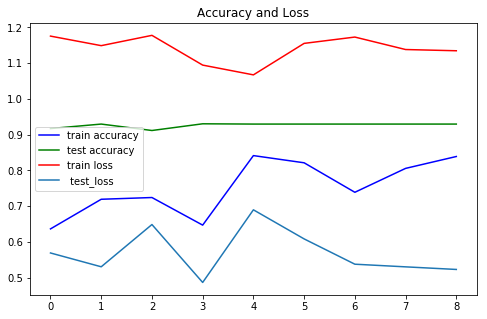

In [295]:
plt.figure(figsize=(8,5))

plt.plot(model.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model.history.history['val_acc'], color='green', label='test accuracy')

plt.plot(model.history.history['loss'], color='red', label='train loss')
plt.plot(model.history.history['val_loss'], label=' test_loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_test_sam, y_test_sam)

In [296]:
print_confusion_matrix(y_test_sam, RNN_preds2_df)

,predicted 0,predicted 1
actual 0,1189,0
actual 1,90,0


In [ ]:
### old - without class weights

6393/6393 [==============================] - 45s 7ms/step


[0.25488349904425545, 0.9299233536494276]

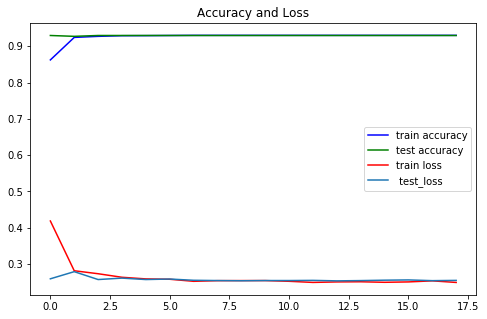

In [274]:
plt.figure(figsize=(8,5))

plt.plot(model.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model.history.history['val_acc'], color='green', label='test accuracy')

plt.plot(model.history.history['loss'], color='red', label='train loss')
plt.plot(model.history.history['val_loss'], label=' test_loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_test, y_test)

In [275]:
RNN_preds2 = model.predict_classes(X_test_sam)

In [276]:
RNN_preds2_df = pd.DataFrame(RNN_preds2[:,0])

In [277]:
print_classification_report(y_test_sam, RNN_preds2_df)

              precision    recall  f1-score   support

    not hate       0.93      1.00      0.96      1189
 hate speech       0.00      0.00      0.00        90

    accuracy                           0.93      1279
   macro avg       0.46      0.50      0.48      1279
weighted avg       0.86      0.93      0.90      1279



In [278]:
print_confusion_matrix(y_test_sam, RNN_preds2_df)

,predicted 0,predicted 1
actual 0,1189,0
actual 1,90,0


In [ ]:
### RNN FULL 

In [297]:
STAMP = 'lstm_%d_%d_%.2f_%.2f'

bst_model_path = STAMP + '.h5'

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_sam),
                                                 y_train_sam)

model = Sequential()

callbacks = [EarlyStopping(monitor='val_loss', patience = 5),
             ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 3),
             ModelCheckpoint(bst_model_path, save_best_only = True, save_weights_only = True)]

model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 139, trainable=False))

model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(LSTM(64, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= rmsprop(lr=.0025, decay=.00001),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 139, 100)          3779500   
_________________________________________________________________
lstm_41 (LSTM)               (None, 139, 32)           17024     
_________________________________________________________________
batch_normalization_41 (Batc (None, 139, 32)           128       
_________________________________________________________________
lstm_42 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_42 (Batc (None, 64)                256       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [298]:
history = model.fit(X_train_sam, 
                    y_train_sam,
                    epochs=30,
                    batch_size=200,
                    callbacks=callbacks,
                    class_weight=class_weights,
                    validation_data=(X_test_sam, y_test_sam))

Train on 5114 samples, validate on 1279 samples
Epoch 1/30
5114/5114 [==============================] - 73s 14ms/step - loss: 0.6284 - acc: 0.7837 - val_loss: 0.5556 - val_acc: 0.9101
Epoch 2/30
5114/5114 [==============================] - 53s 10ms/step - loss: 0.4237 - acc: 0.8962 - val_loss: 0.2744 - val_acc: 0.9296
Epoch 3/30
5114/5114 [==============================] - 43s 8ms/step - loss: 0.2985 - acc: 0.9261 - val_loss: 0.2563 - val_acc: 0.9296
Epoch 4/30
5114/5114 [==============================] - 43s 8ms/step - loss: 0.2633 - acc: 0.9280 - val_loss: 0.2565 - val_acc: 0.9296
Epoch 5/30
5114/5114 [==============================] - 38s 7ms/step - loss: 0.2557 - acc: 0.9292 - val_loss: 0.2558 - val_acc: 0.9296
Epoch 6/30
5114/5114 [==============================] - 38s 8ms/step - loss: 0.2528 - acc: 0.9290 - val_loss: 0.2521 - val_acc: 0.9296
Epoch 7/30
5114/5114 [==============================] - 37s 7ms/step - loss: 0.2517 - acc: 0.9294 - val_loss: 0.2535 - val_acc: 0.9296
Epoch

1279/1279 [==============================] - 7s 5ms/step


[0.2523289987871291, 0.9296325247580414]

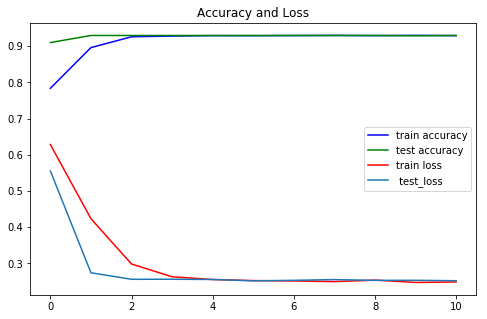

In [299]:
plt.figure(figsize=(8,5))

plt.plot(model.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model.history.history['val_acc'], color='green', label='test accuracy')

plt.plot(model.history.history['loss'], color='red', label='train loss')
plt.plot(model.history.history['val_loss'], label=' test_loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_test_sam, y_test_sam)

In [300]:
print_confusion_matrix(y_test_sam, RNN_preds2_df)

,predicted 0,predicted 1
actual 0,1189,0
actual 1,90,0


### Full dataset

In [156]:
STAMP = 'lstm_%d_%d_%.2f_%.2f'

bst_model_path = STAMP + '.h5'

model = Sequential()

callbacks = [EarlyStopping(monitor='val_loss', patience = 5),
             ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 3),
             ModelCheckpoint(bst_model_path, save_best_only = True, save_weights_only = True)]

model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 139, trainable=False))

model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(LSTM(40, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=rmsprop(lr=.0025, decay=.00001),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 139, 100)          3779500   
_________________________________________________________________
lstm_25 (LSTM)               (None, 139, 20)           9680      
_________________________________________________________________
batch_normalization_25 (Batc (None, 139, 20)           80        
_________________________________________________________________
lstm_26 (LSTM)               (None, 40)                9760      
_________________________________________________________________
batch_normalization_26 (Batc (None, 40)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 41        
Total params: 3,799,221
Trainable params: 19,601
Non-trainable params: 3,779,620
_____________________________________________________________

In [157]:
history = model.fit(X_train_sam, 
                    y_train_sam,
                    epochs=20,
                    batch_size=100,
                    callbacks=callbacks,
#                     class_weight=[{0:1,1:10}],
                    validation_data=(X_test_sam, y_test_sam))

Train on 5114 samples, validate on 1279 samples
Epoch 1/20
5114/5114 [==============================] - 63s 12ms/step - loss: 0.4720 - acc: 0.9087 - val_loss: 0.2792 - val_acc: 0.9343
Epoch 2/20
5114/5114 [==============================] - 46s 9ms/step - loss: 0.2687 - acc: 0.9280 - val_loss: 0.2279 - val_acc: 0.9382
Epoch 3/20
5114/5114 [==============================] - 46s 9ms/step - loss: 0.2851 - acc: 0.9232 - val_loss: 0.2405 - val_acc: 0.9390
Epoch 4/20
5114/5114 [==============================] - 46s 9ms/step - loss: 0.2764 - acc: 0.9276 - val_loss: 0.2272 - val_acc: 0.9398
Epoch 5/20
5114/5114 [==============================] - 44s 9ms/step - loss: 0.2745 - acc: 0.9284 - val_loss: 0.2302 - val_acc: 0.9390
Epoch 6/20
5114/5114 [==============================] - 46s 9ms/step - loss: 0.2759 - acc: 0.9276 - val_loss: 0.5016 - val_acc: 0.9148
Epoch 7/20
5114/5114 [==============================] - 44s 9ms/step - loss: 0.2667 - acc: 0.9269 - val_loss: 0.2254 - val_acc: 0.9406
Epoch 

In [ ]:
model.history

6393/6393 [==============================] - 24s 4ms/step


[0.268253786939514, 0.9289848270707897]

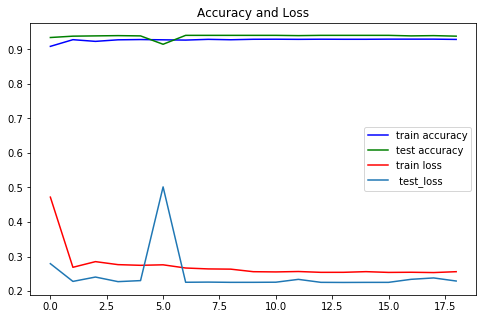

In [158]:
plt.figure(figsize=(8,5))

plt.plot(model.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model.history.history['val_acc'], color='green', label='test accuracy')

plt.plot(model.history.history['loss'], color='red', label='train loss')
plt.plot(model.history.history['val_loss'], label=' test_loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_test, y_test)

In [161]:
RNN_preds = model.predict_on_batch(X_test_sam)

In [179]:
RNN_preds_df = pd.DataFrame(RNN_preds[:,0])

In [188]:
y_test_sam = pd.Series(y_test_sam)
y_test_sam

0       0
1       0
2       0
3       0
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1249    0
1250    0
1251    0
1252    0
1253    0
1254    0
1255    0
1256    0
1257    0
1258    1
1259    0
1260    0
1261    0
1262    0
1263    0
1264    0
1265    0
1266    0
1267    0
1268    0
1269    0
1270    0
1271    0
1272    0
1273    0
1274    0
1275    0
1276    0
1277    0
1278    0
Length: 1279, dtype: int64

In [190]:
preds = pd.DataFrame(RNN_preds)

In [191]:
STAMP = 'lstm_%d_%d_%.2f_%.2f'

bst_model_path = STAMP + '.h5'

model = Sequential()

callbacks = [EarlyStopping(monitor='val_loss', patience = 5),
             ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 3),
             ModelCheckpoint(bst_model_path, save_best_only = True, save_weights_only = True)]

model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 139, trainable=False))

model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(LSTM(40, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=rmsprop(lr=.0025, decay=.00001),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 139, 100)          3779500   
_________________________________________________________________
lstm_27 (LSTM)               (None, 139, 20)           9680      
_________________________________________________________________
batch_normalization_27 (Batc (None, 139, 20)           80        
_________________________________________________________________
lstm_28 (LSTM)               (None, 40)                9760      
_________________________________________________________________
batch_normalization_28 (Batc (None, 40)                160       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 41        
Total params: 3,799,221
Trainable params: 19,601
Non-trainable params: 3,779,620
_____________________________________________________________

In [219]:
history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=50,
                    callbacks=callbacks,
                    class_weight=[{0:1,1:10}],
                    validation_data=(X_test, y_test))

Train on 25569 samples, validate on 6393 samples
Epoch 1/20
20850/25569 [=======================>......] - ETA: 1:09 - loss: 1.8757 - acc: 0.9299

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(model.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model.history.history['val_acc'], color='green', label='test accuracy')

plt.plot(model.history.history['loss'], color='red', label='train loss')
plt.plot(model.history.history['val_loss'], label=' test_loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_test, y_test)

In [ ]:
RNN_preds2 = model.predict_classes(X_test)

In [ ]:
RNN_preds2_df = pd.DataFrame(RNN_preds2[:,0])

In [ ]:
RNN_preds2_df

In [ ]:
print_confusion_matrix(y_test, RNN_preds2_df)

#### Word 2 Vec

In [67]:
from time import time
t = time()

RNN_w2v_model = gensim.models.Word2Vec(X_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.12 mins


In [68]:
RNN_w2v_model.build_vocab

<bound method BaseWordEmbeddingsModel.build_vocab of <gensim.models.word2vec.Word2Vec object at 0x1a46494ef0>>

In [69]:
RNN_w2v_model.train(X_token_list, total_examples=RNN_w2v_model.corpus_count, epochs=RNN_w2v_model.epochs)

(1650239, 1980385)

In [96]:
RNN_w2v_model.save('data/RNN_w2v.model')

RNN_w2v_model = gensim.models.Word2Vec.load('data/RNN_w2v.model')

In [98]:
RNN_w2v_model.vocabulary

In [70]:
RNN_w2v_model.most_similar(['black'])

[('hispanic', 0.7398470044136047),
 ('racist', 0.7013423442840576),
 ('orange', 0.688545286655426),
 ('stomping', 0.6792140007019043),
 ('genius', 0.6784365177154541),
 ('jokes', 0.6783176064491272),
 ('white', 0.6718945503234863),
 ('heels', 0.6717475652694702),
 ('smoking', 0.6666183471679688),
 ('women', 0.6662786602973938)]

In [66]:
X_avg_vectors = np.concatenate([avg_word_vectors(word, RNN_w2v_model) for word in X_token_list])

In [67]:
X_avg_vectors.shape

(31962, 100)

In [177]:
#### this works
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    print(word, i)
    if word in RNN_w2v_model.wv.vocab:
        embedding_matrix[i] = RNN_w2v_model.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

the 1
to 2
i 3
a 4
you 5
and 6
in 7
for 8
of 9
is 10
my 11
it 12
s 13
love 14
this 15
on 16
with 17
be 18
t 19
day 20
that 21
all 22
so 23
are 24
me 25
amp 26
happy 27
your 28
at 29
have 30
we 31
am 32
can 33
just 34
will 35
when 36
not 37
do 38
u 39
what 40
life 41
like 42
time 43
m 44
but 45
today 46
from 47
up 48
now 49
new 50
thankful 51
out 52
as 53
positive 54
get 55
was 56
people 57
about 58
how 59
our 60
bihday 61
good 62
by 63
no 64
they 65
one 66
see 67
more 68
smile 69
if 70
don 71
go 72
who 73
want 74
father 75
he 76
take 77
work 78
healthy 79
re 80
fun 81
weekend 82
an 83
summer 84
has 85
there 86
or 87
make 88
family 89
got 90
us 91
days 92
friday 93
best 94
here 95
great 96
his 97
way 98
need 99
friends 100
beautiful 101
why 102
bull 103
only 104
going 105
first 106
really 107
their 108
wait 109
morning 110
music 111
world 112
back 113
ur 114
tomorrow 115
week 116
know 117
some 118
been 119
very 120
cute 121
sad 122
orlando 123
fathersday 124
never 125
her 126
think 127


animal 1312
ya 1313
land 1314
bored 1315
between 1316
definitely 1317
sadly 1318
allow 1319
front 1320
losing 1321
apparently 1322
lie 1323
colombia 1324
shootings 1325
yum 1326
europe 1327
taken 1328
match 1329
project 1330
schools 1331
faces 1332
lack 1333
powerful 1334
calgary 1335
filled 1336
stress 1337
bigot 1338
user 1339
humpday 1340
natural 1341
heaven 1342
brilliant 1343
stream 1344
lebron 1345
played 1346
watched 1347
thats 1348
spent 1349
shi 1350
ripchristinagrimmie 1351
round 1352
greatest 1353
speech 1354
studio 1355
released 1356
michael 1357
science 1358
winter 1359
dude 1360
shoot 1361
price 1362
goodtimes 1363
attention 1364
delicious 1365
client 1366
ball 1367
gives 1368
fat 1369
awards 1370
pig 1371
cards 1372
boss 1373
within 1374
answer 1375
fab 1376
hispanic 1377
singer 1378
rainbow 1379
society 1380
growing 1381
cream 1382
possible 1383
woke 1384
pls 1385
positivevibes 1386
board 1387
worse 1388
pick 1389
hopefully 1390
current 1391
afraid 1392
market 1393
goog

orlandonightclubshooting 2612
apa 2613
ed 2614
seeks 2615
amarinder 2616
selflove 2617
loveyourself 2618
mentalhealth 2619
compassion 2620
prison 2621
remix 2622
xd 2623
management 2624
masterkeyexperience 2625
wasted 2626
un 2627
groups 2628
checked 2629
lookin 2630
stick 2631
tagsforlikes 2632
adventures 2633
lo 2634
spa 2635
priceless 2636
humble 2637
prize 2638
min 2639
marijuana 2640
lessons 2641
forgotten 2642
embrace 2643
mac 2644
foot 2645
distance 2646
useless 2647
prince 2648
immigration 2649
fundraising 2650
peppa 2651
preorder 2652
frm 2653
pharrell 2654
waited 2655
jim 2656
lovers 2657
battle 2658
lifecoach 2659
picking 2660
whenever 2661
besties 2662
rage 2663
ink 2664
november 2665
large 2666
seats 2667
zelda 2668
hv 2669
failed 2670
posting 2671
allah 2672
complain 2673
rap 2674
mc 2675
brunette 2676
paper 2677
announces 2678
racial 2679
mon 2680
musical 2681
access 2682
confirmed 2683
cheap 2684
disgusted 2685
sms 2686
uni 2687
reveal 2688
dis 2689
summit 2690
unleashy

tournament 3908
marine 3909
christianity 3910
hippie 3911
nowhere 3912
contain 3913
trucks 3914
hottweets 3915
tower 3916
fixed 3917
mindsconsole 3918
nonsense 3919
owners 3920
marseille 3921
fate 3922
assume 3923
staytuned 3924
clarity 3925
darkness 3926
rbc 3927
bacon 3928
tax 3929
actorslife 3930
equal 3931
deaths 3932
sub 3933
championship 3934
cc 3935
neighborhood 3936
vile 3937
eek 3938
saddened 3939
motherfucker 3940
beta 3941
beings 3942
onference 3943
weapon 3944
overweight 3945
scifi 3946
button 3947
max 3948
fries 3949
coupon 3950
filming 3951
insights 3952
amount 3953
pages 3954
mercy 3955
kscrashcorrectors 3956
tuesdaymotivation 3957
drove 3958
brazil 3959
asshole 3960
momlife 3961
coverage 3962
cope 3963
handle 3964
daisy 3965
dna 3966
unknown 3967
pit 3968
became 3969
solo 3970
loosing 3971
texts 3972
ceo 3973
mast 3974
diego 3975
outta 3976
condition 3977
belong 3978
swift 3979
se 3980
bruh 3981
mission 3982
forgiveness 3983
mans 3984
feeding 3985
followback 3986
captio

bk 5225
screening 5226
sassy 5227
brains 5228
archery 5229
performer 5230
required 5231
creator 5232
hairdresser 5233
baku 5234
recovers 5235
fighter 5236
elizabeth 5237
saving 5238
aging 5239
tds 5240
hire 5241
adrenaline 5242
scumbag 5243
farming 5244
grandparents 5245
tend 5246
retire 5247
bron 5248
ceainly 5249
kentucky 5250
offering 5251
buildings 5252
lessismore 5253
witch 5254
ache 5255
osaka 5256
jon 5257
promised 5258
beep 5259
comedians 5260
items 5261
customerservice 5262
pinoy 5263
investment 5264
dnc 5265
acoustic 5266
nationals 5267
comfoable 5268
ford 5269
fakenews 5270
prayforchristina 5271
latin 5272
fridayfun 5273
trusted 5274
legit 5275
capitalstb 5276
breeze 5277
luke 5278
vancouver 5279
password 5280
msg 5281
wholesome 5282
climate 5283
ottawa 5284
bihdaysway 5285
toast 5286
marks 5287
explains 5288
virgin 5289
glowing 5290
omfg 5291
includes 5292
taco 5293
pepper 5294
minneapolis 5295
marbs 5296
prejudice 5297
stages 5298
wanting 5299
teddy 5300
replace 5301
catlo

beachday 6441
amy 6442
understatement 6443
makeamericagreatagain 6444
flamingo 6445
kickstaer 6446
bankruptcy 6447
mebeforeyou 6448
tyranny 6449
relief 6450
flame 6451
uniform 6452
scrubs 6453
tank 6454
alley 6455
moods 6456
amor 6457
paz 6458
device 6459
messing 6460
barack 6461
brows 6462
tacos 6463
deny 6464
attorney 6465
tolstoy 6466
psalm 6467
enjoyment 6468
charleston 6469
thanx 6470
complaints 6471
vigil 6472
slap 6473
ishq 6474
peach 6475
nfl 6476
cube 6477
latte 6478
cursedchild 6479
drum 6480
ralph 6481
alllivesmatter 6482
mecca 6483
presentations 6484
stocked 6485
spokesperson 6486
tail 6487
cowboy 6488
spray 6489
perfume 6490
nitro 6491
sounding 6492
merely 6493
stoptheviolence 6494
abasel 6495
neil 6496
cbs 6497
yyt 6498
scheduled 6499
gossip 6500
maternity 6501
destroying 6502
eia 6503
filling 6504
faithful 6505
cleared 6506
jar 6507
taichi 6508
zootopia 6509
sided 6510
midsummer 6511
pakistani 6512
membership 6513
dramatic 6514
appearance 6515
nudist 6516
playoffs 6517
r

acquired 7159
cupcakes 7160
equipment 7161
impo 7162
thoughtful 7163
acknowledge 7164
instaday 7165
pe 7166
fucks 7167
rejection 7168
donor 7169
lite 7170
foodblogger 7171
jehovah 7172
thugs 7173
bigly 7174
syndrome 7175
graders 7176
ta 7177
recall 7178
tops 7179
ro 7180
yah 7181
bigender 7182
darkknight 7183
objective 7184
gettingfitter 7185
phoenix 7186
graduates 7187
muna 7188
shos 7189
bullet 7190
pundits 7191
rapacious 7192
hairstyle 7193
emojis 7194
elementary 7195
glory 7196
projection 7197
cult 7198
pllseason 7199
greater 7200
thumb 7201
mubarak 7202
define 7203
homedecor 7204
unprofessional 7205
heros 7206
sundayvibes 7207
uploading 7208
lifetime 7209
aft 7210
hooray 7211
cyclists 7212
adopt 7213
justme 7214
fp 7215
hidden 7216
draghi 7217
aftr 7218
wud 7219
nikki 7220
steals 7221
spotted 7222
villa 7223
metro 7224
remake 7225
conman 7226
zionazis 7227
accidents 7228
pablo 7229
dearest 7230
basket 7231
needahug 7232
ece 7233
item 7234
collab 7235
scheme 7236
soexcited 7237
eag

glastonburyfestival 8429
felicidade 8430
nancy 8431
customised 8432
pat 8433
scotus 8434
linstagram 8435
linzy 8436
fiestar 8437
bsb 8438
genre 8439
oskar 8440
css 8441
opps 8442
nintendoe 8443
latvia 8444
ballet 8445
zaynmalik 8446
positiveenergy 8447
highfive 8448
dub 8449
thegreatest 8450
harmful 8451
boanoite 8452
frio 8453
wingers 8454
macedonia 8455
sinks 8456
obligation 8457
republic 8458
ootdwiwtmetodayfwisfashion 8459
swagfringedayoffgoodday 8460
yard 8461
cretin 8462
federal 8463
candle 8464
fyi 8465
flex 8466
tvk 8467
disco 8468
apologize 8469
melissa 8470
addict 8471
pockets 8472
couture 8473
reset 8474
agency 8475
minsk 8476
uphill 8477
tak 8478
reform 8479
louise 8480
hay 8481
bonnaroo 8482
newadventure 8483
dancelife 8484
heights 8485
decides 8486
chanel 8487
legitimately 8488
libraries 8489
preparations 8490
melodic 8491
overloaded 8492
ramdan 8493
amjoy 8494
unmasking 8495
profiles 8496
pooch 8497
clintons 8498
nationallobsterday 8499
dishes 8500
announcements 8501
gom

glee 9060
conferences 9061
deliveries 9062
tel 9063
nickjonas 9064
staffordshire 9065
keen 9066
felicidad 9067
funk 9068
sinking 9069
dresser 9070
hundred 9071
brunettes 9072
vision 9073
tf 9074
denied 9075
gucci 9076
heh 9077
woohooo 9078
grimm 9079
notices 9080
bossmum 9081
nigel 9082
farage 9083
gweh 9084
wypipo 9085
lastdayofschool 9086
moi 9087
kp 9088
kilo 9089
transgender 9090
peak 9091
davey 9092
downloading 9093
renewing 9094
dowhatyoulove 9095
wip 9096
itworks 9097
complained 9098
funnehanever 9099
freetime 9100
sane 9101
sends 9102
fireflymusicfestival 9103
activist 9104
lmaoo 9105
scandal 9106
applications 9107
buyer 9108
paypal 9109
yeezy 9110
reservation 9111
kanyewest 9112
intrigue 9113
wt 9114
sheriff 9115
untill 9116
doyou 9117
lov 9118
msqrd 9119
doctors 9120
adopted 9121
foxnews 9122
wang 9123
grades 9124
amongst 9125
costume 9126
fullest 9127
messaged 9128
smb 9129
contour 9130
suppression 9131
oiler 9132
hooker 9133
crashed 9134
cheesecake 9135
snowflakes 9136
clas

greatnohswim 10323
rik 10324
prod 10325
senseaboutmaths 10326
mothereah 10327
biscuits 10328
framed 10329
jets 10330
inspo 10331
lookbook 10332
quicker 10333
blackpeople 10334
liveme 10335
onairnow 10336
goodfeeling 10337
cameronstaff 10338
camstaff 10339
officerstaff 10340
cowardcops 10341
extent 10342
complicit 10343
savile 10344
paedobritain 10345
rodthegod 10346
salam 10347
summershowers 10348
bassist 10349
nepal 10350
ay 10351
djhumility 10352
ripojb 10353
areacodemixshow 10354
tornado 10355
projecting 10356
hindus 10357
femikuti 10358
unpacks 10359
asianmen 10360
datingapps 10361
edgy 10362
bernanke 10363
bailed 10364
dumping 10365
frenzy 10366
unbreakablekimmyschmidt 10367
vancity 10368
justbe 10369
superfabric 10370
recuerdos 10371
peers 10372
ounces 10373
kickstaercampaign 10374
morrow 10375
yacht 10376
waits 10377
saddens 10378
wrestler 10379
vt 10380
greetingcards 10381
ryder 10382
lyme 10383
hapus 10384
needles 10385
blackface 10386
legislative 10387
mrssa 10388
rajkuamar 1

thot 10949
theodore 10950
dadjokes 10951
bham 10952
skg 10953
jeffrey 10954
rabbit 10955
indefensible 10956
socialaction 10957
lovesong 10958
thumping 10959
aum 10960
mckechnie 10961
ckkosho 10962
spectators 10963
askmehow 10964
writeyourstressaway 10965
ix 10966
fc 10967
housewife 10968
linking 10969
dayslinky 10970
topping 10971
mika 10972
mata 10973
rani 10974
kass 10975
princessestelle 10976
nationalday 10977
bcn 10978
catalunya 10979
knowledgeispower 10980
bringin 10981
funandgames 10982
rejoice 10983
forsale 10984
porcelain 10985
fairmont 10986
produce 10987
handwriting 10988
pieceofme 10989
seventh 10990
peshawar 10991
scuffle 10992
rises 10993
cheatday 10994
doterra 10995
rapes 10996
insidethebelljar 10997
hobi 10998
tae 10999
glove 11000
bulk 11001
weddingtime 11002
tuesdays 11003
domino 11004
cph 11005
edi 11006
instag 11007
bootcamp 11008
maidsafe 11009
maidstone 11010
bcoz 11011
grabbed 11012
manami 11013
kevyn 11014
orr 11015
gents 11016
alton 11017
towers 11018
goromania 

porsche 11603
crucible 11604
dreamy 11605
voyage 11606
loyalcustomer 11607
celebratory 11608
anguish 11609
rockshotel 11610
babalargunu 11611
kutlu 11612
olsun 11613
clubbers 11614
islamophobe 11615
spoken 11616
panties 11617
neon 11618
summerholiday 11619
rexit 11620
neighbourgoods 11621
vps 11622
bonuses 11623
tmobiletuesdays 11624
suya 11625
slowday 11626
rva 11627
rustic 11628
vermin 11629
triumphant 11630
onset 11631
turkish 11632
riga 11633
polish 11634
larrydavid 11635
registering 11636
churros 11637
ommmy 11638
storytime 11639
thirdwheel 11640
awkwardmoment 11641
capacity 11642
handed 11643
pugsofinstagram 11644
applied 11645
iamchoosinglove 11646
fixture 11647
newstyle 11648
xhaka 11649
rodriquez 11650
pmln 11651
oye 11652
shikari 11653
jumat 11654
quake 11655
tittytuesday 11656
wintergreen 11657
tri 11658
deer 11659
naturelovers 11660
tab 11661
justus 11662
ripanton 11663
missu 11664
luth 11665
indefinite 11666
xterra 11667
joys 11668
foodiechats 11669
booth 11670
quotesilove

composer 12280
pains 12281
embodiment 12282
wipe 12283
fairies 12284
contingent 12285
smilingbutimclosetotears 12286
pumpkin 12287
exograndcomeback 12288
porno 12289
hrss 12290
interviewed 12291
nof 12292
phc 12293
incoherent 12294
shameless 12295
minimalism 12296
simbi 12297
osis 12298
shatter 12299
ripinkylife 12300
ilovemylife 12301
ananas 12302
newplace 12303
nighttime 12304
starfleet 12305
theview 12306
nbaupdates 12307
nbadraft 12308
wearetech 12309
womenintech 12310
insecure 12311
lovelive 12312
phit 12313
envelope 12314
holidayvibes 12315
catalyst 12316
ett 12317
mrandmrs 12318
locs 12319
westcoast 12320
revine 12321
abomination 12322
committing 12323
clause 12324
mylebeach 12325
hefty 12326
giggle 12327
finna 12328
pleasedontrain 12329
volkswagen 12330
moveon 12331
gaaftershocks 12332
andretti 12333
spewing 12334
gdegblog 12335
thegreenpalmcottage 12336
plettenburgbay 12337
westerncape 12338
thyini 12339
thiza 12340
educator 12341
instill 12342
mole 12343
lou 12344
accordingly

stereotyping 12895
vista 12896
mv 12897
letest 12898
displaced 12899
nausea 12900
sextips 12901
liveahappysexylife 12902
glutes 12903
jst 12904
pma 12905
heawarming 12906
mozlondon 12907
gluten 12908
applekeynote 12909
unpacking 12910
newproduct 12911
fck 12912
ineedtoconsult 12913
slaughterhouse 12914
ers 12915
tyra 12916
shouting 12917
hairy 12918
antisemitic 12919
comparable 12920
flames 12921
mens 12922
lonliness 12923
admitting 12924
pointed 12925
ldr 12926
medford 12927
liat 12928
mankind 12929
teamlh 12930
coffeetime 12931
animalkingdom 12932
takemeback 12933
gettingready 12934
fabdivas 12935
imm 12936
bein 12937
necessary 12938
hiddleston 12939
stlouis 12940
doobie 12941
gram 12942
disadvantaged 12943
beth 12944
yesss 12945
repulsive 12946
remained 12947
summeriscoming 12948
pawsome 12949
motoz 12950
stain 12951
mormon 12952
backs 12953
gol 12954
beardy 12955
workbook 12956
counseling 12957
happyness 12958
thisis 12959
afterward 12960
wifehappylife 12961
agrees 12962
cathedral 

elderflower 13489
madeintheusa 13490
beautyblogger 13491
residential 13492
hrithik 13493
lifetips 13494
positivethoughts 13495
grain 13496
stems 13497
zzzzzzzz 13498
bozo 13499
alison 13500
piranaship 13501
wagner 13502
jamie 13503
dakota 13504
colin 13505
gadgets 13506
situtation 13507
cuss 13508
tarnation 13509
varejao 13510
jackass 13511
moan 13512
ccmf 13513
bbloggers 13514
permission 13515
enjoyable 13516
flick 13517
assumptions 13518
southpo 13519
birday 13520
marsh 13521
blake 13522
israelis 13523
banking 13524
regulator 13525
housemate 13526
americano 13527
proscar 13528
reallove 13529
freckles 13530
powering 13531
improv 13532
eyfs 13533
mmmiastar 13534
moans 13535
stockings 13536
abraham 13537
pomegranate 13538
banger 13539
ws 13540
raalhugandu 13541
konik 13542
odisha 13543
beh 13544
homehouse 13545
sayin 13546
ecourse 13547
livinghappy 13548
thrives 13549
buzzfeed 13550
johnlewis 13551
itiswhatitis 13552
sexliesnegos 13553
faye 13554
resnick 13555
zedd 13556
dayum 13557
ang

impatiently 14164
highgate 14165
archway 14166
gether 14167
nomorehate 14168
instapicinstagoodinstafashion 14169
heir 14170
cadillac 14171
aspie 14172
commonsense 14173
hookah 14174
toby 14175
stinkyclothes 14176
lede 14177
inv 14178
bayshore 14179
oakmont 14180
lizzie 14181
treatyourself 14182
bouquet 14183
conditions 14184
bruce 14185
eloise 14186
sweetbabins 14187
adventurous 14188
sitgesanytime 14189
sob 14190
clubs 14191
manipulative 14192
weddingwednesday 14193
pebble 14194
rated 14195
ceegee 14196
smcr 14197
hourglass 14198
sampling 14199
earlyyears 14200
nationaleggday 14201
omarmateen 14202
hopkins 14203
bugger 14204
rnb 14205
clips 14206
sounded 14207
antiamerican 14208
prevention 14209
proposed 14210
feather 14211
orlandoshootings 14212
lazyday 14213
instaselfie 14214
creepiest 14215
thala 14216
begging 14217
leakag 14218
zipline 14219
orla 14220
funds 14221
manners 14222
helluva 14223
jobboard 14224
fayetteville 14225
sparkles 14226
coleen 14227
telaviv 14228
personaltraini

ironing 14772
outsidesunshine 14773
couldnt 14774
letthegamebefair 14775
folklore 14776
llc 14777
iot 14778
eyez 14779
disavow 14780
battleofbastards 14781
bihdayy 14782
pour 14783
soggy 14784
calabash 14785
ungrateful 14786
puremichigan 14787
justarrived 14788
statenisland 14789
statenislandny 14790
statenislandnewyork 14791
mvp 14792
beans 14793
whitewashing 14794
kwak 14795
veganism 14796
pjk 14797
overdoses 14798
thathelpsnoone 14799
dentalcrisis 14800
sturgeon 14801
gels 14802
friendzone 14803
shoage 14804
kwanzaa 14805
pulitzer 14806
woodrowwilson 14807
sacred 14808
fx 14809
ilovemyjob 14810
shenanigans 14811
eurogamer 14812
comfoably 14813
taster 14814
cob 14815
supplying 14816
bitterness 14817
knight 14818
lakepo 14819
changeyourlife 14820
aspire 14821
snobs 14822
tpc 14823
igazi 14824
font 14825
bizziboo 14826
dice 14827
owes 14828
sundown 14829
towns 14830
travellers 14831
parkinsons 14832
bestrong 14833
brewpix 14834
ccblooms 14835
misogynists 14836
unreformable 14837
josie 

oceansprings 15440
mangomachiato 15441
koith 15442
meetupswithfriend 15443
throwbackyesterday 15444
tms 15445
cous 15446
businessireland 15447
beachbarseasunlove 15448
yepp 15449
escapinqlifee 15450
illustrated 15451
dhabas 15452
highways 15453
ganjas 15454
rafaella 15455
ointb 15456
stussy 15457
assure 15458
throatcoattea 15459
magictea 15460
newclassmates 15461
nostench 15462
sabotaged 15463
stalked 15464
retaliated 15465
slandered 15466
finalfreebies 15467
osu 15468
osugrad 15469
hulahoop 15470
mygiantlife 15471
outdoing 15472
hardtimes 15473
breakingup 15474
imu 15475
spongieacresbedandbreakfast 15476
ninomiya 15477
kazunari 15478
ninomiyakazunari 15479
kroos 15480
toungeouttuesday 15481
configmgr 15482
sccm 15483
refugeeweek 15484
resta 15485
liveauthentic 15486
chowchow 15487
jolly 15488
bestanden 15489
fls 15490
friedrichlist 15491
generals 15492
pappi 15493
ulverstontri 15494
realperson 15495
meh 15496
doitfohevine 15497
deepsea 15498
emotionalsadhiphopbe 15499
nextyear 15500
a

loafers 16079
whitemarkedition 16080
berkowitz 16081
achievegoals 16082
besuccessful 16083
loveyourjob 16084
fabcon 16085
videomaking 16086
productiveday 16087
nottheendoftheworld 16088
ngit 16089
coombes 16090
rsc 16091
ripshuaibuamodu 16092
empress 16093
regnant 16094
paake 16095
yourhea 16096
bossdog 16097
willy 16098
wrassling 16099
ces 16100
biology 16101
lc 16102
wors 16103
backtowhatidobest 16104
deeptissuemassage 16105
dontask 16106
zumba 16107
harrystyles 16108
dfana 16109
confederateflag 16110
norespect 16111
ywt 16112
auditorium 16113
attenborough 16114
wwwsmallgirlsexcom 16115
waleng 16116
spiderdad 16117
compromise 16118
becauseofhim 16119
passpos 16120
englishfans 16121
letdown 16122
gloomy 16123
dxq 16124
winwritersfest 16125
mommas 16126
transphobia 16127
enablin 16128
slowdown 16129
manic 16130
kyncalendargirls 16131
knowyournormal 16132
alota 16133
arise 16134
farah 16135
islamophobic 16136
chumps 16137
wedeyrush 16138
scottieandrussell 16139
ejuice 16140
handcrafted 

werkit 16755
kw 16756
ubt 16757
babs 16758
morningcoffee 16759
strudel 16760
aisdproud 16761
pss 16762
ifidontgetmyfirstchoice 16763
huff 16764
shadesofwhite 16765
compose 16766
assaulted 16767
tramp 16768
unsolvable 16769
friendlyrobotics 16770
rl 16771
odometer 16772
reconfig 16773
patently 16774
preturnaturally 16775
devoid 16776
rearing 16777
cipdnap 16778
terrorizing 16779
lbvr 16780
rosabohneur 16781
parisjetaime 16782
labase 16783
knickers 16784
reggie 16785
whitelab 16786
villetta 16787
banningofpostpress 16788
colne 16789
blueshour 16790
minuteforever 16791
minutepleasestaytogether 16792
sucky 16793
fucky 16794
nehruji 16795
rgds 16796
cassiegotrobbed 16797
theyreperfect 16798
afterspringingreenland 16799
englishlakedistrict 16800
dinnerdate 16801
beachy 16802
rawfoheoceans 16803
fleurette 16804
instaboyinstamansefieseptumfriend 16805
smilesblackandwhite 16806
gej 16807
offices 16808
crusade 16809
incoming 16810
swiftlang 16811
tailgating 16812
paulocoelho 16813
letitbe 16814


islamicterorrist 17431
lgbtresilience 17432
swam 17433
pyrocynical 17434
tastes 17435
trailheadx 17436
punedug 17437
riporlando 17438
interacts 17439
impacts 17440
sdoh 17441
eyeland 17442
outlast 17443
trailor 17444
thrills 17445
whiteslavers 17446
nica 17447
whiteslavery 17448
tvtdisaster 17449
memoriez 17450
neal 17451
warriorsvcavs 17452
omarosa 17453
sherrifs 17454
noooooo 17455
ersasmus 17456
iansomerhalder 17457
randa 17458
tecia 17459
focusonyou 17460
theydontevenknowyouexsit 17461
plannedparenthood 17462
thickskin 17463
accurate 17464
imdying 17465
rexes 17466
taming 17467
einstein 17468
mih 17469
starlink 17470
subaru 17471
withfriends 17472
gnam 17473
enteainers 17474
paasa 17475
backstabbers 17476
thetruth 17477
konst 17478
littlemixconce 17479
juhu 17480
victor 17481
whhaaaaaaaatt 17482
bestivedone 17483
radiating 17484
swatchingclosely 17485
horn 17486
wheelyfunday 17487
livemoreyha 17488
happinesstherapy 17489
recites 17490
cancellations 17491
suicideprevention 17492
sol

lapin 18109
dreamsarecomingtrue 18110
bestfeeling 18111
cuddlingweather 18112
sweetdream 18113
predicta 18114
petsofinstagram 18115
melb 18116
sleepybeauty 18117
degrade 18118
loveliest 18119
kilamiti 18120
nialhoranfacts 18121
niallerwins 18122
justindrewbieber 18123
justindb 18124
believetou 18125
mitchellrattle 18126
mitchell 18127
goodson 18128
boosta 18129
subsonica 18130
mitici 18131
cosa 18132
avete 18133
preparato 18134
unfriend 18135
negatively 18136
parentage 18137
tfbjp 18138
openfollow 18139
pacifists 18140
crazydog 18141
bestdog 18142
birdies 18143
platinium 18144
solvay 18145
feelgoodmusic 18146
feelgoodsummer 18147
hunp 18148
caed 18149
powermoves 18150
brainstorming 18151
imperfect 18152
lala 18153
aliso 18154
canyons 18155
aakhri 18156
kunjsarna 18157
attendant 18158
unwilling 18159
handsomeboy 18160
handsomeguy 18161
aaronrhodes 18162
greeneggsandham 18163
realissue 18164
fillibuster 18165
corbinrayp 18166
snapchatfilter 18167
msgapparelstoday 18168
makingpeoplehappy 

goosebumps 18752
breadheads 18753
greedheads 18754
careerchange 18755
uidesign 18756
uxdesign 18757
plated 18758
chandeliers 18759
iwantto 18760
naming 18761
dismantling 18762
trader 18763
roi 18764
mmydaddyslittlegirl 18765
jaipurdiaries 18766
fathersdaypapa 18767
deese 18768
lukin 18769
socialmooc 18770
aslipanga 18771
prokabaddi 18772
afteryou 18773
wack 18774
hillsidebeachclub 18775
naturesea 18776
fuckingmotherfucker 18777
prays 18778
favcolourblue 18779
wohamestates 18780
lovingthecocktails 18781
aiyanapa 18782
manam 18783
paradigmnewyork 18784
paradigmny 18785
catcherhandmadefirst 18786
daredevil 18787
ballard 18788
nigerians 18789
pdp 18790
apc 18791
stalling 18792
casey 18793
withdean 18794
sposman 18795
beautifulshoes 18796
lifeproblems 18797
handout 18798
isitok 18799
clifton 18800
cravetv 18801
freakout 18802
selfiemegirlslife 18803
officialmbmusic 18804
muavelvetliplacquer 18805
teamyvette 18806
shrek 18807
nofascist 18808
unveil 18809
brighest 18810
diabetics 18811
craftc

musicblog 19402
filmstudies 19403
screenwriting 19404
mycelebtravelagent 19405
poh 19406
lahat 19407
wn 19408
opposing 19409
incline 19410
tink 19411
dibiking 19412
republicantrash 19413
transcripts 19414
wedontwinanymore 19415
buildthewall 19416
twiggers 19417
piped 19418
cushion 19419
hattipattisson 19420
kayecalonweloveopm 19421
blessedwithwork 19422
sexyboy 19423
spared 19424
busybee 19425
alohalife 19426
pioneers 19427
alliesmommy 19428
stopisalm 19429
muslimcontrolnow 19430
yogaday 19431
imnotchild 19432
tabique 19433
flamboyant 19434
fiji 19435
geller 19436
truthstrangehanfiction 19437
californiabeforeandafter 19438
kilometer 19439
potholes 19440
breakers 19441
fundu 19442
socialroadtrip 19443
croissants 19444
harvesting 19445
wcs 19446
loveyourlife 19447
freetobeme 19448
delusions 19449
rideshare 19450
ahintofjoy 19451
clarification 19452
bleedpurple 19453
toocoldu 19454
gofrogs 19455
weoutchea 19456
inthestreets 19457
weloveatlanta 19458
justrhee 19459
evilweather 19460
hotty 

dash 20134
dial 20135
iiba 20136
barkada 20137
bmc 20138
bmclife 20139
girlyholiday 20140
christy 20141
heroines 20142
tamanna 20143
appendix 20144
footfault 20145
yearsold 20146
plateforme 20147
imsohappy 20148
ecdaelite 20149
aascf 20150
vikings 20151
pom 20152
libwizard 20153
deletion 20154
iframes 20155
embed 20156
blackboard 20157
onyx 20158
equaling 20159
finditinworcestershire 20160
tayyaar 20161
deewano 20162
bikinis 20163
englishtutoring 20164
pacificolifecentre 20165
panamapacifico 20166
dz 20167
ehn 20168
inmythoughts 20169
humansgetyourshittogether 20170
ilovethebeach 20171
sneaked 20172
smiths 20173
holdall 20174
feelinggone 20175
soonmy 20176
tangledfx 20177
vases 20178
thetaylorway 20179
oke 20180
beads 20181
iludioweddings 20182
iludio 20183
pappy 20184
suckstobeyou 20185
russiafans 20186
cowereds 20187
contrary 20188
mmvas 20189
scripture 20190
dubnationbelieves 20191
updateverything 20192
angrybird 20193
ndle 20194
motivat 20195
followuk 20196
spyware 20197
unreliable

pridepassionpurpose 20851
bmo 20852
horribleteacher 20853
twisting 20854
bruises 20855
tours 20856
uo 20857
limecrime 20858
tweetin 20859
sumin 20860
spewed 20861
gilwern 20862
nobodybelievesyou 20863
snaparazzi 20864
durdledoor 20865
dominicanrepublic 20866
bavarobeach 20867
laplaya 20868
girlstrip 20869
gomera 20870
elhierro 20871
pratteln 20872
timetogettowork 20873
boringdrive 20874
bundayfree 20875
nf 20876
dissointed 20877
evehing 20878
bereft 20879
bonn 20880
windeck 20881
constructive 20882
akudlalwa 20883
supply 20884
phed 20885
colouringbook 20886
metallicpencils 20887
scented 20888
gelpens 20889
proudtobefromohio 20890
heavenlyfather 20891
lordhavemercy 20892
breakthebarrel 20893
thelawofguns 20894
television 20895
hicp 20896
bleachers 20897
atlantis 20898
nrol 20899
nasa 20900
deltaiv 20901
aniversarioinfantil 20902
transexual 20903
fiance 20904
adamson 20905
eugenie 20906
usernameregenerated 20907
astros 20908
bullseye 20909
wron 20910
emigrated 20911
liveinakindhea 20912


cspan 21619
gotjoy 21620
growl 21621
unloading 21622
pointscore 21623
miraclesfromheaven 21624
prefeer 21625
shillary 21626
billingsgate 21627
mixology 21628
imesh 21629
finalist 21630
imeshmktg 21631
proliferating 21632
galvanize 21633
elevator 21634
dominic 21635
mitbmatch 21636
hotass 21637
nutritionalrebalancing 21638
stayourlife 21639
shopaholics 21640
addled 21641
survival 21642
wetrying 21643
fairuse 21644
wtfu 21645
postpone 21646
shinhye 21647
tame 21648
doubletap 21649
compos 21650
quinnhaley 21651
askamaal 21652
watchingyou 21653
goofin 21654
classicman 21655
basilica 21656
roaring 21657
cheapshot 21658
lowblow 21659
mahi 21660
phipps 21661
phippsplaza 21662
ngos 21663
stopbrandingyourselves 21664
poweools 21665
recycled 21666
dived 21667
planks 21668
compost 21669
seedlings 21670
sheisoftenconfused 21671
beyondourcontrol 21672
henleyhawks 21673
henleyregatta 21674
unadulterated 21675
vaseegupurdantelflowersvizit 21676
dayshand 21677
madevasse 21678
naturelove 21679
naturel 

velour 22345
scrub 22346
weneed 22347
ageoftrump 22348
grassrootsaction 22349
citizenaction 22350
citizenry 22351
publicpolicy 22352
tikila 22353
bellyburningbootcamp 22354
caf 22355
nearing 22356
fadfudge 22357
vandalism 22358
listed 22359
tresor 22360
nuit 22361
sparksomethinggood 22362
goodcause 22363
mutually 22364
creeps 22365
hearingallhersong 22366
aymcuainraiser 22367
aym 22368
broda 22369
tacosforlunch 22370
putt 22371
seemore 22372
unused 22373
wilmingtonnc 22374
choicesdcp 22375
rou 22376
controle 22377
peake 22378
yawn 22379
introduc 22380
pursuitofhappyness 22381
versailles 22382
throwbacks 22383
padamum 22384
pathachu 22385
iethumatum 22386
pakale 22387
illuminate 22388
carrizales 22389
brightens 22390
mummylove 22391
joyfulweddingsong 22392
twinsong 22393
popwedding 22394
yesiwantu 22395
gonnabemarried 22396
felizsabado 22397
mumus 22398
nithya 22399
idi 22400
roju 22401
womensrighttochoose 22402
bedgebury 22403
feelslikechristmaseve 22404
parisianbreakfast 22405
brewed 

ucs 23052
willaliana 23053
kindewo 23054
sheisfour 23055
instacutie 23056
babyfashionista 23057
trench 23058
stansmith 23059
adidasshoes 23060
textile 23061
nevadacubpride 23062
kerstin 23063
langenberger 23064
rumbleoutthebox 23065
gbk 23066
persibarema 23067
dancingqueenonly 23068
annakahnuielsen 23069
annukah 23070
stanton 23071
newplay 23072
kilohoku 23073
weekendfullofsurprises 23074
unitedstateschampion 23075
uschampion 23076
sdlive 23077
sposspecialties 23078
whateva 23079
maintained 23080
ayrshire 23081
bourbonstreet 23082
jackbauer 23083
libeypr 23084
airwaves 23085
mantle 23086
shirley 23087
chisolm 23088
qoutes 23089
teacherlife 23090
teacherproblems 23091
digs 23092
itshappening 23093
vocalproducing 23094
singlereleasesoon 23095
happinesswins 23096
prospective 23097
gonnabebusy 23098
sexcam 23099
skyprivate 23100
anas 23101
nimra 23102
farishta 23103
mawia 23104
khushal 23105
obtained 23106
striped 23107
stripedlove 23108
pan 23109
nomuraforum 23110
verify 23111
disapponted

sneijder 23748
robben 23749
asx 23750
exhibitionsday 23751
downanothersize 23752
paws 23753
dany 23754
orneles 23755
tiyo 23756
bhabhi 23757
draymon 23758
ijs 23759
wifeandhusband 23760
hugssmile 23761
inlovenofilterdadandmomnice 23762
uberrush 23763
loversplayz 23764
barren 23765
contentious 23766
mannequinchallenge 23767
mgt 23768
cardetail 23769
hahha 23770
vines 23771
monty 23772
penstemon 23773
demob 23774
blazing 23775
saddles 23776
fingerpaint 23777
funwithdaddy 23778
childesh 23779
ballers 23780
gtx 23781
strix 23782
hahahahaaa 23783
jlaw 23784
actionkids 23785
coolkids 23786
debasing 23787
trytobepositive 23788
teachersinjune 23789
asgore 23790
undeale 23791
toie 23792
nooooooooo 23793
petitsfilousfirsts 23794
britmumspics 23795
snaphappybritmums 23796
connector 23797
seeyousoonbeach 23798
hapoyfathersday 23799
roland 23800
garros 23801
crazyhorse 23802
fleurs 23803
papierpeint 23804
pap 23805
quotas 23806
oneweek 23807
excavations 23808
communityarcheaology 23809
tinctures 23

tacobell 24482
porque 24483
fi 24484
scratching 24485
depravity 24486
expectationshu 24487
revoke 24488
presentmood 24489
maetamong 24490
lovemybestie 24491
stepawayfromtheipad 24492
billyocean 24493
endemic 24494
institutions 24495
solotrip 24496
solooverseastrip 24497
ausbound 24498
bitcold 24499
extramannnvid 24500
mannnfam 24501
waytomanyfreakinhashtags 24502
stonecoldcreamery 24503
thetazshow 24504
humpdaypromos 24505
tazmaniax 24506
kicker 24507
replayed 24508
crowdcube 24509
simplified 24510
newlight 24511
newlightcinemas 24512
bigboy 24513
happing 24514
rafi 24515
tux 24516
harristiestoarmin 24517
buurrendimitrivegas 24518
likemikehardwell 24519
gegenrechts 24520
nostrache 24521
noafd 24522
nopegida 24523
populism 24524
nonazis 24525
aufstehn 24526
maricism 24527
idealist 24528
proclaim 24529
granth 24530
sahib 24531
hayleyatwell 24532
fes 24533
aciclovir 24534
strokes 24535
moped 24536
rallyofthecorn 24537
dongiovanni 24538
rewatch 24539
arresteddevelopment 24540
foiin 24541
b

teenhealth 25188
vapers 25189
ecig 25190
sahirbhasin 25191
isha 25192
ishir 25193
iaint 25194
erinviversfergusonmusic 25195
lgbtmusicians 25196
vivekshraya 25197
daymade 25198
mwahahahaha 25199
spafrancorchamps 25200
tcrseries 25201
jcb 25202
trailn 25203
smoother 25204
reaperfamily 25205
freeways 25206
shippers 25207
complementarianism 25208
complementarian 25209
mindfully 25210
altering 25211
sodium 25212
nitrate 25213
msgrenaway 25214
imhappy 25215
silverado 25216
ocsc 25217
orlvsj 25218
knocking 25219
lovethemall 25220
begginer 25221
ilovea 25222
ilovepaint 25223
mayma 25224
unawareness 25225
englishteacher 25226
fash 25227
bigtime 25228
ineptness 25229
xtatic 25230
emerged 25231
gorgeouspieces 25232
nickel 25233
clifford 25234
ponce 25235
shopetsyuk 25236
dole 25237
vmin 25238
gleb 25239
savchenko 25240
sharna 25241
burgess 25242
singsbeautiful 25243
pirat 25244
jehna 25245
godson 25246
underbelly 25247
tafree 25248
jub 25249
phopo 25250
phoposarecoming 25251
surpriseflopped 25252

jabardasti 25906
photosession 25907
nikkhhil 25908
framelements 25909
bihdayqueen 25910
hotelma 25911
sweeping 25912
trina 25913
nicknames 25914
jewelries 25915
boarded 25916
dayearly 25917
backgroud 25918
asianface 25919
tde 25920
elizabethtaylor 25921
toughweek 25922
ooyama 25923
eyelashes 25924
miq 25925
slovakia 25926
boyrobot 25927
ifyousawinyouwhatisee 25928
corpuz 25929
rocksteddy 25930
rudd 25931
momentous 25932
twsteelmavericklaunch 25933
noattitude 25934
ilift 25935
runnergirl 25936
biggerproblems 25937
humanitymurder 25938
terribleday 25939
nepa 25940
exfoliating 25941
hydrating 25942
sebbo 25943
visitation 25944
mendopilates 25945
konnectyourself 25946
feelingbad 25947
fling 25948
develope 25949
recyclable 25950
avenged 25951
sevenfold 25952
seize 25953
synystergates 25954
seizetheday 25955
pofolios 25956
parentsrecord 25957
evaluating 25958
listers 25959
djsnake 25960
puaj 25961
citytissues 25962
jesusforgives 25963
downhill 25964
tucker 25965
paisanhack 25966
employ 25967

michaelcalfan 26606
petous 26607
connectmodata 26608
frump 26609
meteorologist 26610
westernsahara 26611
algerian 26612
aupol 26613
excitemen 26614
vibrantskinvibrantlife 26615
babyw 26616
imgonnabeadad 26617
cuttack 26618
odi 26619
bcci 26620
kaaen 26621
dalmore 26622
malt 26623
cheney 26624
attractions 26625
conferencing 26626
collegehereicome 26627
veep 26628
footballers 26629
findesemana 26630
sabado 26631
magicalthingsbymiriam 26632
realism 26633
gonsalves 26634
americangirldoll 26635
stimulates 26636
begood 26637
joshuabreazeale 26638
youready 26639
jamba 26640
melt 26641
feelsorryforme 26642
worknight 26643
poalorigins 26644
opacity 26645
rainbowcake 26646
bethanybakes 26647
halaaaaa 26648
anyare 26649
nagpapakatanga 26650
restopresto 26651
marketingweeknyc 26652
winery 26653
valdobbiadene 26654
manhate 26655
schweinski 26656
whosana 26657
appalled 26658
thebarn 26659
gainwithxtiandelashoutoutgaininstant 26660
chrismukkah 26661
amandlaaaaaaaaaaa 26662
deceitful 26663
changesne 2

diplomadoenmarketingdigital 27329
terminamos 27330
newworld 27331
littlw 27332
workingmum 27333
destinlibrary 27334
gameface 27335
pearlman 27336
ripjulie 27337
doggiestyle 27338
coldplayzurich 27339
shakeyourbutt 27340
moviemotivation 27341
futurebright 27342
selfiequeen 27343
chiropractic 27344
compensatory 27345
iswar 27346
deliento 27347
debuting 27348
bcu 27349
summershows 27350
dilapidated 27351
blight 27352
mississippi 27353
structures 27354
domme 27355
bonny 27356
scottishborder 27357
malay 27358
jalapeno 27359
springwavesunset 27360
knackered 27361
sakura 27362
kinomoto 27363
aah 27364
daahling 27365
whaon 27366
sexandthecity 27367
whitepower 27368
copious 27369
technique 27370
newmoves 27371
guster 27372
lebronjames 27373
stanervous 27374
yakang 27375
yaka 27376
meters 27377
directions 27378
closures 27379
fluently 27380
astronomical 27381
thevoiceuk 27382
tram 27383
sargaams 27384
peacefulbdaytou 27385
phishing 27386
hinaholics 27387
drudge 27388
fishingpole 27389
nationalit

feyfan 28046
merriam 28047
psychologicaldisorder 28048
uriah 28049
asante 28050
yogis 28051
swirl 28052
brackets 28053
topeka 28054
mangara 28055
yos 28056
ftm 28057
smallnerd 28058
unscrambled 28059
unrapp 28060
playday 28061
robots 28062
robotawithhea 28063
spate 28064
peacock 28065
croke 28066
cipdireland 28067
armani 28068
scale 28069
cambma 28070
harvardsq 28071
steinway 28072
caps 28073
vapefam 28074
vapinglifestyle 28075
vapehappy 28076
muslm 28077
shhhh 28078
cmn 28079
donttellsarah 28080
toofunny 28081
bark 28082
doggiedaycare 28083
mallow 28084
suggests 28085
teamcap 28086
captainamerica 28087
alexpascal 28088
easteuropeans 28089
leighton 28090
nathancreations 28091
tters 28092
hayirlicumalar 28093
damsel 28094
reddish 28095
instawoman 28096
duplicate 28097
wednesdays 28098
sexymundie 28099
movingagain 28100
sarada 28101
gloom 28102
ifeelrelaxed 28103
mystarsdeserveallthehappiness 28104
pasha 28105
pouting 28106
cheermeup 28107
plagiarizes 28108
relentlessly 28109
trumptaint 

resurface 28786
babai 28787
gareki 28788
bihdaybalayya 28789
gravitationalwaves 28790
einsteinwasrightagain 28791
experimenting 28792
goatmilk 28793
myperson 28794
ilikeyou 28795
quintet 28796
ladunia 28797
nightlive 28798
garbagepailkids 28799
allgrownup 28800
richest 28801
librarians 28802
buff 28803
healthymindset 28804
mobi 28805
fabio 28806
iacono 28807
principi 28808
squeegee 28809
screenprinting 28810
screenprint 28811
giddykipper 28812
thegoodboxph 28813
tuttiweekend 28814
glendale 28815
leisuretime 28816
bangsean 28817
milksshop 28818
generationkkk 28819
frindz 28820
rashford 28821
lallana 28822
neville 28823
hodgson 28824
mclarenhonda 28825
pension 28826
salvadoran 28827
sposcaster 28828
pressies 28829
cheered 28830
bestofluck 28831
warsforoil 28832
golduck 28833
psyduck 28834
pokemonanime 28835
wateype 28836
awwwwwwwwwwwwwww 28837
tarnished 28838
ebhour 28839
modelbaby 28840
aalivyahsimon 28841
rabanal 28842
waino 28843
extras 28844
lgm 28845
thwithrisp 28846
tmrrw 28847
sel

rename 29469
berpose 29470
meagainbeautywithaynk 29471
sameshitnewyear 29472
fundamentalism 29473
calisthenics 29474
hydrate 29475
ministering 29476
rev 29477
mbamalu 29478
tdh 29479
celebratejesusservice 29480
bollywoodnight 29481
blessedb 29482
comparing 29483
needinesslevel 29484
standupcomedy 29485
bgwg 29486
stupidest 29487
safarilive 29488
ease 29489
revolts 29490
nin 29491
nomoreshootings 29492
blacklightslide 29493
raft 29494
salford 29495
quays 29496
gmw 29497
goingwell 29498
hopefeully 29499
authority 29500
letterkenny 29501
pennyloafer 29502
notrump 29503
nokkk 29504
captivating 29505
pugsley 29506
luigi 29507
chatty 29508
barstaff 29509
craftbeernerd 29510
kearny 29511
weappreciateourcustomers 29512
sedan 29513
jic 29514
bukas 29515
basquetball 29516
pvi 29517
boasts 29518
tyruswong 29519
thwaed 29520
constrained 29521
hellskitchen 29522
protects 29523
beehungry 29524
honeyiloveyou 29525
disloyal 29526
wheeler 29527
jag 29528
coolers 29529
inconsequen 29530
compet 29531
hat

mobay 30196
yeaaaaaahhh 30197
ect 30198
jcpenney 30199
azealia 30200
mcmillan 30201
beatit 30202
restyle 30203
layered 30204
baylaygeombre 30205
fulwood 30206
sipped 30207
foamy 30208
steamed 30209
mannered 30210
impresses 30211
grandmothers 30212
battleofthebastards 30213
dumbingdown 30214
tatted 30215
thefashionrepoeravels 30216
panagia 30217
panagiaagitra 30218
gowarriorsgo 30219
pleaselike 30220
usaflagday 30221
linear 30222
dubstep 30223
terahero 30224
curbed 30225
curbedwheel 30226
alloywheel 30227
bollocks 30228
firstcollege 30229
demn 30230
length 30231
typically 30232
mourns 30233
vibrator 30234
hiroshima 30235
allout 30236
alrigth 30237
arianagrande 30238
irelandeuro 30239
educo 30240
edujobs 30241
momanddaughter 30242
onlywhitechristmas 30243
howtobesingle 30244
hudgens 30245
petting 30246
buoys 30247
favoriteband 30248
purge 30249
tipsforlife 30250
fashioncolorshandmadejewelryfashionableredwhiteblue 30251
naturallybeautiful 30252
mothe 30253
rejecting 30254
erociabritannia 

streetscene 30913
emotionallyalone 30914
statesman 30915
robb 30916
ptitn 30917
dictate 30918
isr 30919
isd 30920
hsci 30921
bodygym 30922
loseweight 30923
posture 30924
childhoodruined 30925
chod 30926
perpetuating 30927
subversive 30928
daysofsmiles 30929
arianegrande 30930
foodmylove 30931
hughjackman 30932
wolverine 30933
goblue 30934
refillable 30935
abpoli 30936
consoles 30937
backtomytheaterroots 30938
lbsdown 30939
inshape 30940
bikiniseason 30941
waitingsultan 30942
makeitagoodone 30943
diasoleado 30944
buquiinsigniac 30945
homecenter 30946
calle 30947
dannellross 30948
nakz 30949
meep 30950
consisted 30951
fragmentation 30952
waybackeednesday 30953
ideacity 30954
zoomer 30955
zoomerplex 30956
surges 30957
lifefriend 30958
filly 30959
separation 30960
fracus 30961
mirage 30962
macho 30963
chuckydoll 30964
dustyfairytale 30965
selfemployed 30966
minleerice 30967
upholds 30968
wickedness 30969
steveking 30970
enddogfighting 30971
battlefront 30972
trilogy 30973
cylinders 30974
b

voicing 31640
suffrage 31641
lordvenkateswara 31642
govindagovinda 31643
igboy 31644
iplayer 31645
voilence 31646
balearics 31647
bathed 31648
beds 31649
kimber 31650
teemoarmy 31651
teemo 31652
xxfitness 31653
yoh 31654
tarek 31655
overwhelming 31656
echoes 31657
chinesefestival 31658
suppoyourfrontline 31659
suppoallinanurses 31660
mna 31661
putcarebackinhealthcare 31662
teamlandesk 31663
sitsselfie 31664
whiskeybar 31665
fitfriday 31666
attachment 31667
vicky 31668
astrology 31669
tonigth 31670
lifeisrosy 31671
defensively 31672
socialclass 31673
andharilo 31674
unna 31675
manaki 31676
ante 31677
ishtam 31678
eldest 31679
warrios 31680
icant 31681
supermariorun 31682
wootwoot 31683
wordtrumplethinskin 31684
stopthebashing 31685
voteblue 31686
werewedrunk 31687
weloveclothespins 31688
cnnelection 31689
parroting 31690
fath 31691
firestation 31692
como 31693
fosse 31694
desenho 31695
dragqueen 31696
iammyself 31697
felixyosua 31698
bestassociatesever 31699
hardrock 31700
hardrockhotel

IndexError: index 31963 is out of bounds for axis 0 with size 31963

In [ ]:
# Step I: Create a data frame with # sentences X # max sequence length (15) rows and # word features + 1 columns
## First column represent the index of the word
sentences_to_word_idx_df = pd.DataFrame(np.concatenate((data.reshape(60, 1), np.zeros((60, 100))), axis=1))

# Step II: Run a for loop to find each word by its index and insert its w2v representation to the other 300 columns
for idx in range(sentences_to_word_idx_df.shape[0]):
    word_idx = sentences_to_word_idx_df.loc[idx, 0]
    try:
        word_vec = RNN_word2vec[index_word[word_idx]]
        sentences_to_word_idx_df.iloc[idx, 1:] = word_vec
    except:
        pass

# Step III: reshape to get 3d array
sentences_to_word_idx_array = np.array(sentences_to_word_idx_df.iloc[:, 1:]).reshape(-1, 15, 100)

In [ ]:
#### RNN Code